

# Biblioteki, stałe i funkcje

In [350]:
install.packages("Deriv")
library(Deriv)

f<-function(x){(x-2)^2-8}
df<-Deriv(f,"x")
d2f<-Deriv(df,"x")

f_1<-function(x){-exp(-x^2)}
df_1<-Deriv(f_1,"x")
d2f_1<-Deriv(df_1,"x")

lower<- -12
upper<-12
tol<-1e-3

golden_ratio <- (1+sqrt(5))/2

Warning message:
"package 'Deriv' is in use and will not be installed"


# Procedura wyszukiwania przedziału zawierającego minimum dla funkcji unimodalnej (bracketing)

In [351]:
band.search <- function(f, x0, delta) {
    points_band<-c()
    
    f.x0 <- f(x0)
    f.pd <- f(x0 + delta)
    f.md <- f(x0 - delta)
    points_band<-c(points_band,c(x0,x0 + delta,x0 - delta))
    if (!all(sapply(c(f.x0, f.pd, f.md), is.finite))) { #aby funkcja kontynuowała, wszystkie wartości muszą być skończone
        stop("Function value is not finite")
        }
    
    
    if (f.x0 <= min(f.pd, f.md)) { #Jeżeli w punkcie x0 wartość funkcji jest nie większa niż pozostałych dwóch punktach, 
                                # to oznacza,  że w przedziale od
                                #x0 - delta do x0 + delta musi znajdować się poszukiwane minimum
        return(range(x0 + delta, x0 - delta)) 
    } else if (f.x0 > max(f.pd, f.md)) { # Jeżeli wartość funkcji w punkcie x0 jest większa niż w pozostałych dwóch punktach 
                                        #oznacza to, że badana funkcja nie jest unimodalna w minimum 
                                        #(ponieważ musi posiadać maksimum lokalne) i funkcja przerywa działanie.
        stop("Function is not unimodal in minimum")
    } else if (f.pd > f.md) { #Ostatnim przypadkiem jest sytuacja, wktórej wartość funkcji w punkcie x0 leży 
                                #pomiędzy pozostałymi wartościami. 
        search <- -delta #kierunek spadku funkcji
        f.x2 <- f.md

    } else { 
        search <- delta #kierunek spadku funkcji
        f.x2 <- f.pd
        
    } 
    
    
    x1 <- x0 #punkt startowy
    x2 <- x0 + search #punkt startowy + krok w kierunku spadku
    
    repeat { #powtarzamy aż do skutku
        
        x3 <- x0 + 2 * search # x3 to punkt startowy + 2 kroki w kierunku spadku
        points_band<-c(points_band,c(x1,x2,x3))
        
        if (!is.finite(x3)) {
            stop("Proper interval not found") #za każdym razem patrzymy czy wartość x nowego jest skończona w rozumieniu przez R
        }
        
        f.x3 <- f(x3)
        
        if (!is.finite(f.x3)) {
            stop("Function value is not finite") #za każdym razem patrzymy czy wartość funkcji dla nowego kroku jest skończona
        }
        
        if (f.x3 > f.x2) { #idziemy tak daleko w kierunku spadku, aż wartość funkcji dla najdalszego krok przewyższy 
                            #swoją wartością wartość funkcji dla drugiego kroku.
            result<-list("optimal interval"=range(x1, x3),"points band"=points_band)
            return(result)
        }
        
        search <- 2 * search #co pętlę podwajamy krok
        x1 <- x2 #co pętlę przesuwamy się z krokami dalej, w stronę spadku
        x2 <- x3
        f.x2 <- f.x3
    }
}

In [352]:
draw_iteration_band<-function(n,precision){
    x<-seq(min(result_band[[2]][3*n-2],result_band[[2]][3*n-1],result_band[[2]][3*n]),
           max(result_band[[2]][3*n-2],result_band[[2]][3*n-1],result_band[[2]][3*n]),precision)
    plot(x,f(x),lwd=0.01) 
    points(result_band[[2]][3*n-2],f(result_band[[2]][3*n-2]),col="red",lwd=7)
    text(result_band[[2]][3*n-2],f(result_band[[2]][3*n-2])*1.007,"x1")
    points(result_band[[2]][3*n-1],f(result_band[[2]][3*n-1]),col="red",lwd=7)
    text(result_band[[2]][3*n-1],f(result_band[[2]][3*n-1])*1.007,"x2")
    points(result_band[[2]][3*n],f(result_band[[2]][3*n]),col="red",lwd=7)
    text(result_band[[2]][3*n],f(result_band[[2]][3*n])*1.005,"x3")
}

### Przykład bracketingu

In [353]:
result_band=band.search(f,-20,1)
result_band

$`optimal interval`
[1] -12  12

$`points band`
 [1] -20 -19 -21 -20 -19 -18 -19 -18 -16 -18 -16 -12 -16 -12  -4 -12  -4  12

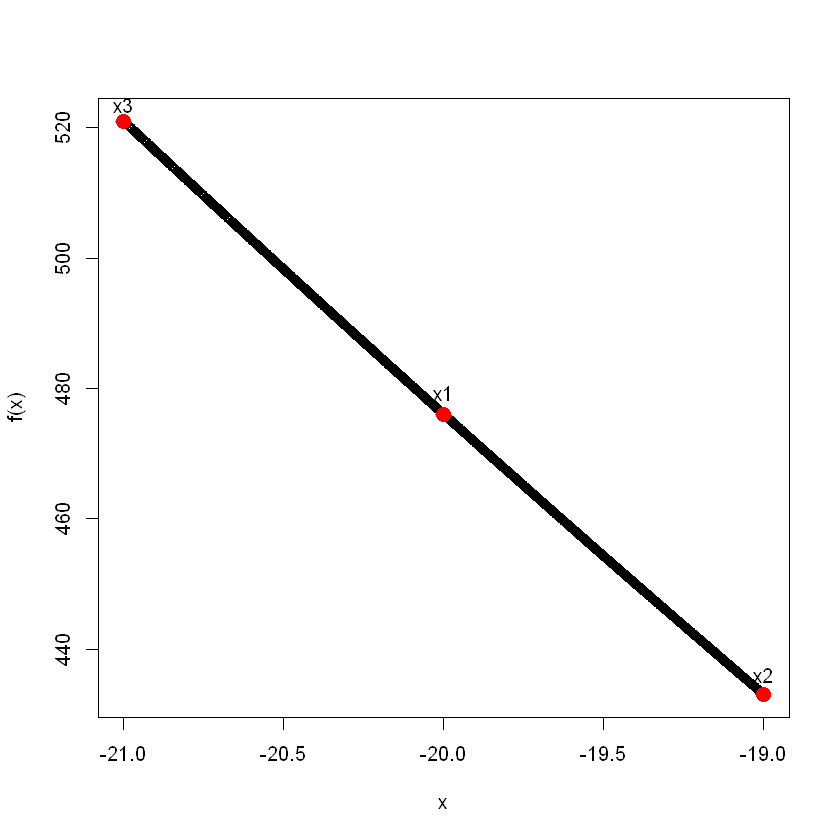

In [354]:
draw_iteration_band(1,0.001) #special case

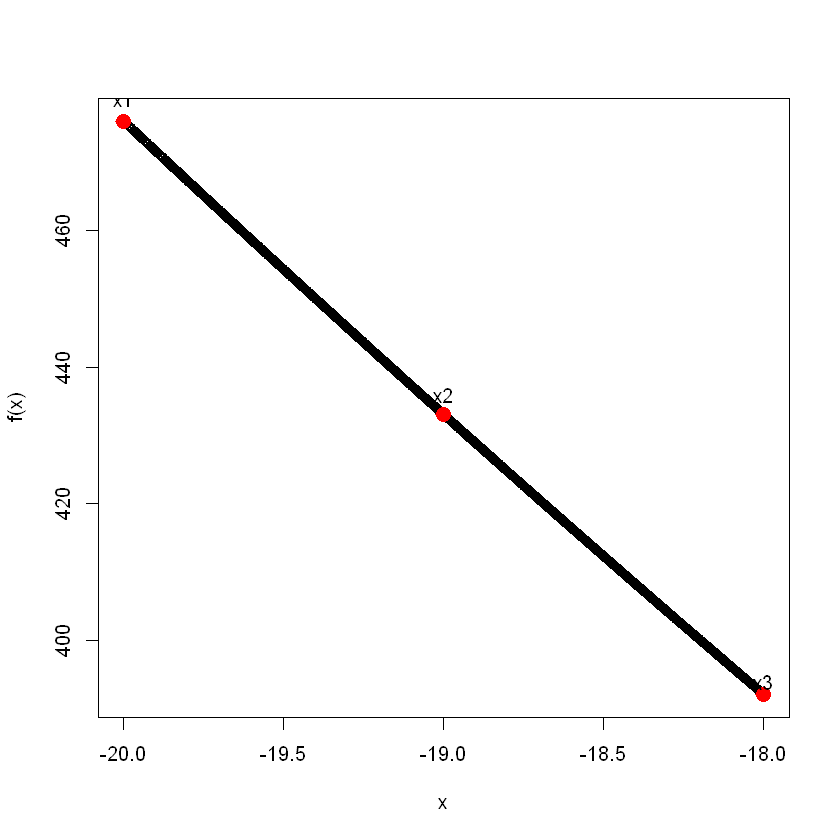

In [355]:
draw_iteration_band(2,0.001)

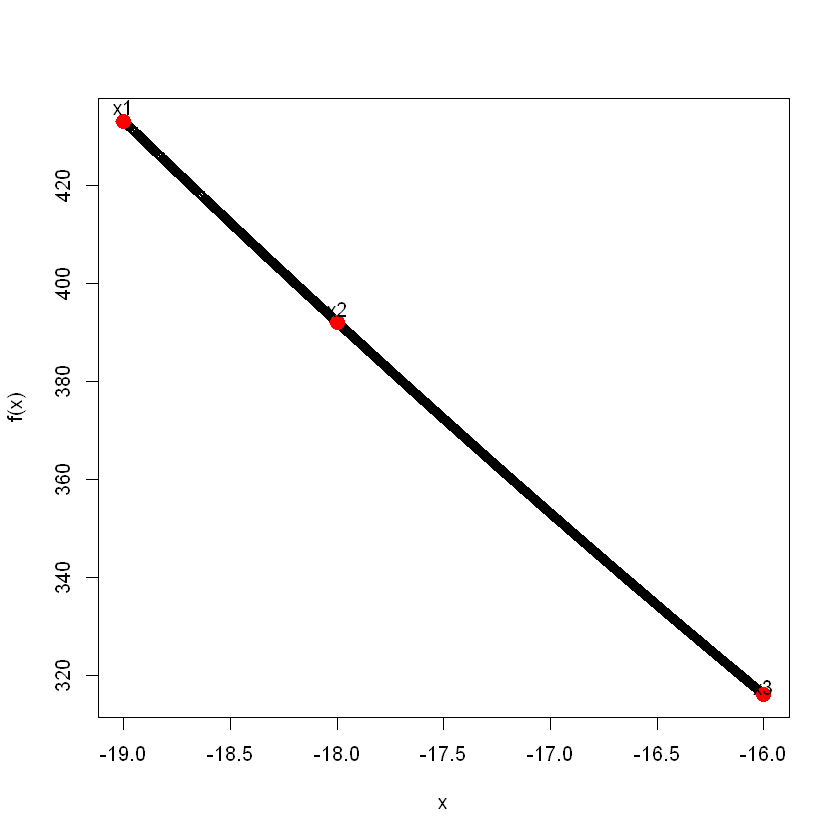

In [356]:
draw_iteration_band(3,0.001)

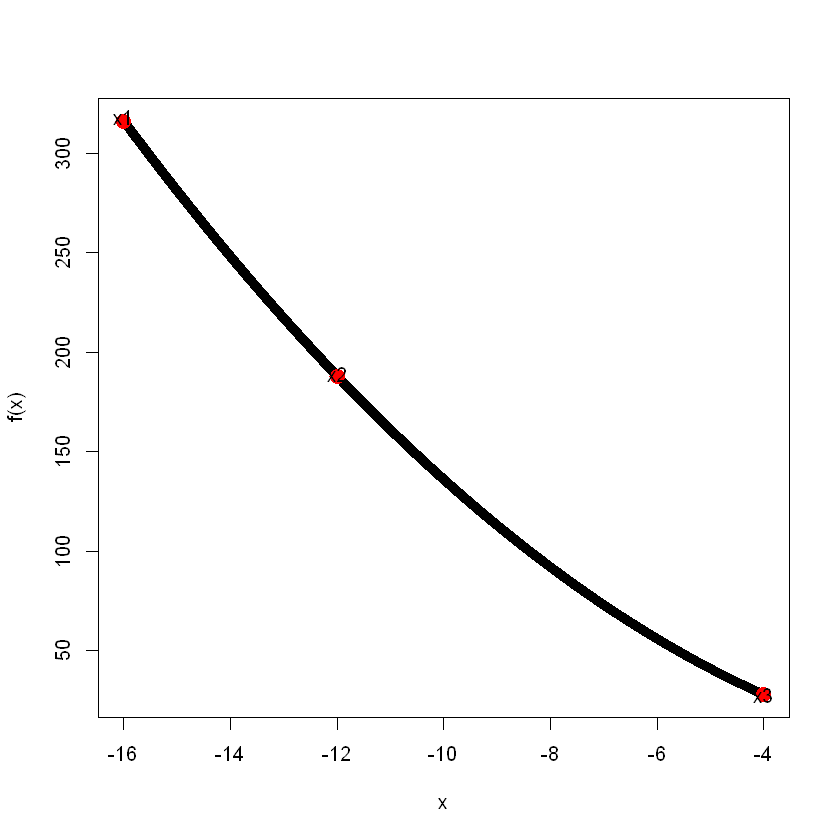

In [357]:
draw_iteration_band(5,0.001)

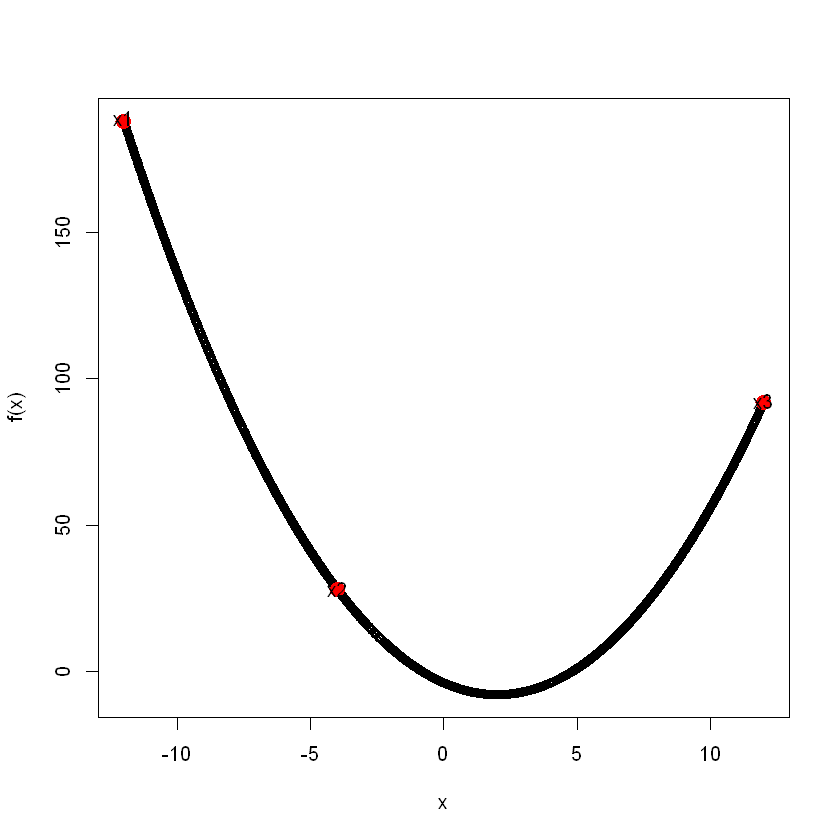

In [358]:
draw_iteration_band(6,0.01)

# Przeszukiwanie potrójne - ternary search

### Rozwiązanie odpowiednie dla funkcji unimodalnych (z jednym minimum)

In [359]:
ternary <- function(f, lower, upper, tol) {
    f.lower <- f(lower)
    f.upper <- f(upper)
    
    #kod do wykresu===================================================================
    brackets<-c()
    x_pairs<-c()
    brackets<-c(brackets,c(lower,upper))
    cat("Rozpoczęcie optymalizacji. Wartość dolna: ",lower,"Wartość górna: ",upper,"\n\n")
    iteracja<-1
    #========================================================================================
    
    while (abs(upper - lower) > 2 * tol) { #aż do momentu gdy różnica nie będzie mniejsza niż 2xtolerancja
        cat("Rozpoczęcie pętli numer",iteracja,"Wartość dolna: ",lower,"Wartość górna: ",upper,"\n")
        x1 <- (2 * lower + upper) / 3 # zmienna x1 ląduje w 1/3 aktualnego przedziału
        f.x1 <- f(x1)
        x2 <- (lower + 2 * upper) / 3 # zmienna x2 ląduje w 2/3 aktualnego przedziału
        f.x2 <- f(x2)
        
        cat("Analizowane punkty w 1/3 i 2/3 przedziału: ",x1," oraz ",x2,"\n")
        cat("Wartość funkcji dla tych punktów to odpowiednio: ",f.x1," oraz ",f.x2,"\n")
        x_pairs<-c(x_pairs,c(x1,x2))

        if (f.x1 < f.x2) { #jeżeli wartość funkcji w lewej części jest niższa niż w prawej, ograniczamy przedział ze strony wyższej wartości
            upper <- x2
            f.upper <- f.x2
            cat("Wartość funkcji z lewej strony niższa niż z prawej. Aktualizacja wartości prawej strony przedziału na ",upper, "\n\n")
            brackets<-c(brackets,c(lower,upper))
        } else {            #jeżeli wartość funkcji w prawej części jest niższa niż w lewej,  ograniczamy przedział ze strony wyższej wartości
            lower <- x1
            f.lower <- f.x1
            cat("Wartość funkcji z prawej strony niższa niż z lewej. Aktualizacja wartości lewej strony przedziału na ",lower,"\n\n")
            brackets<-c(brackets,c(lower,upper))
        }
    iteracja<-iteracja+1
    }
    
    optim_point<-(upper + lower) / 2
    cat("Znaleziony punkt optymalny to: ",optim_point)
    result<-list("optim_point"=optim_point,"brackets"=brackets,"x_pairs"=x_pairs)
    return(result)
}

In [360]:
draw_iteration_ternary<-function(n){
    x<-seq(lower,upper,0.01)
    plot(x,f(x),lwd=0.01) 
    abline(v=result[[3]][n*2-1])
    abline(v=result[[3]][n*2])
    points(result[[2]][n*2-1],f(result[[2]][n*2-1]),col="red",lwd=7)
    points(result[[2]][n*2],f(result[[2]][n*2]),col="red",lwd=7)
    segments(result[[3]][n*2-1],f(result[[3]][n*2-1]),result[[3]][n*2],f(result[[3]][n*2]))
}

### Przykład działania algorytmu ternary search

In [361]:
result=ternary(f,lower,upper,tol)

Rozpoczęcie optymalizacji. Wartość dolna:  -12 Wartość górna:  12 

Rozpoczęcie pętli numer 1 Wartość dolna:  -12 Wartość górna:  12 
Analizowane punkty w 1/3 i 2/3 przedziału:  -4  oraz  4 
Wartość funkcji dla tych punktów to odpowiednio:  28  oraz  -4 
Wartość funkcji z prawej strony niższa niż z lewej. Aktualizacja wartości lewej strony przedziału na  -4 

Rozpoczęcie pętli numer 2 Wartość dolna:  -4 Wartość górna:  12 
Analizowane punkty w 1/3 i 2/3 przedziału:  1.333333  oraz  6.666667 
Wartość funkcji dla tych punktów to odpowiednio:  -7.555556  oraz  13.77778 
Wartość funkcji z lewej strony niższa niż z prawej. Aktualizacja wartości prawej strony przedziału na  6.666667 

Rozpoczęcie pętli numer 3 Wartość dolna:  -4 Wartość górna:  6.666667 
Analizowane punkty w 1/3 i 2/3 przedziału:  -0.4444444  oraz  3.111111 
Wartość funkcji dla tych punktów to odpowiednio:  -2.024691  oraz  -6.765432 
Wartość funkcji z prawej strony niższa niż z lewej. Aktualizacja wartości lewej strony prze

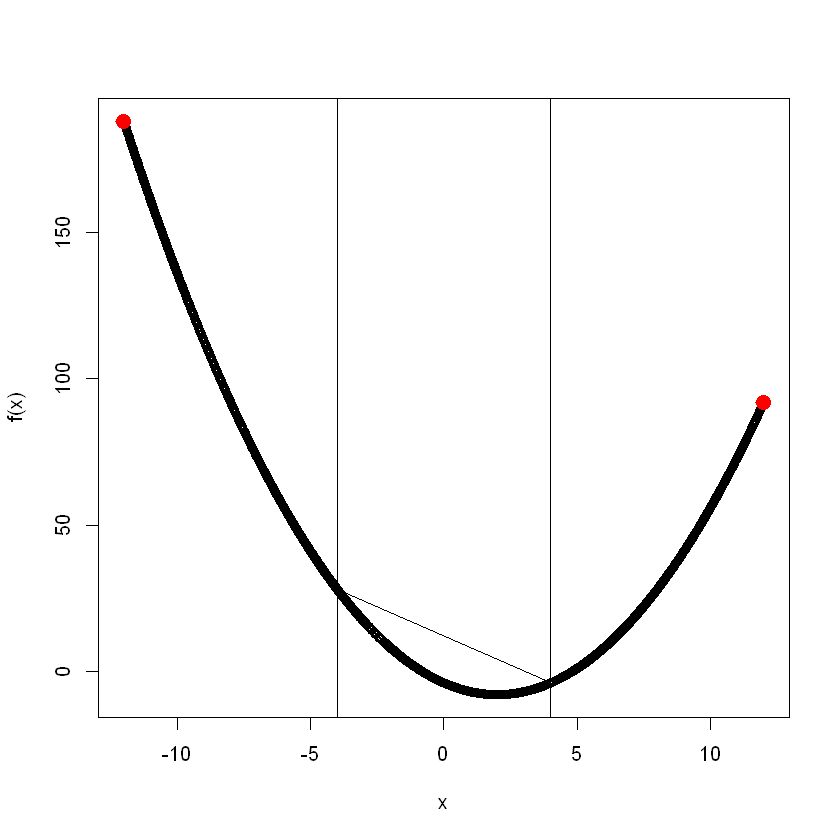

In [362]:
draw_iteration_ternary(1)

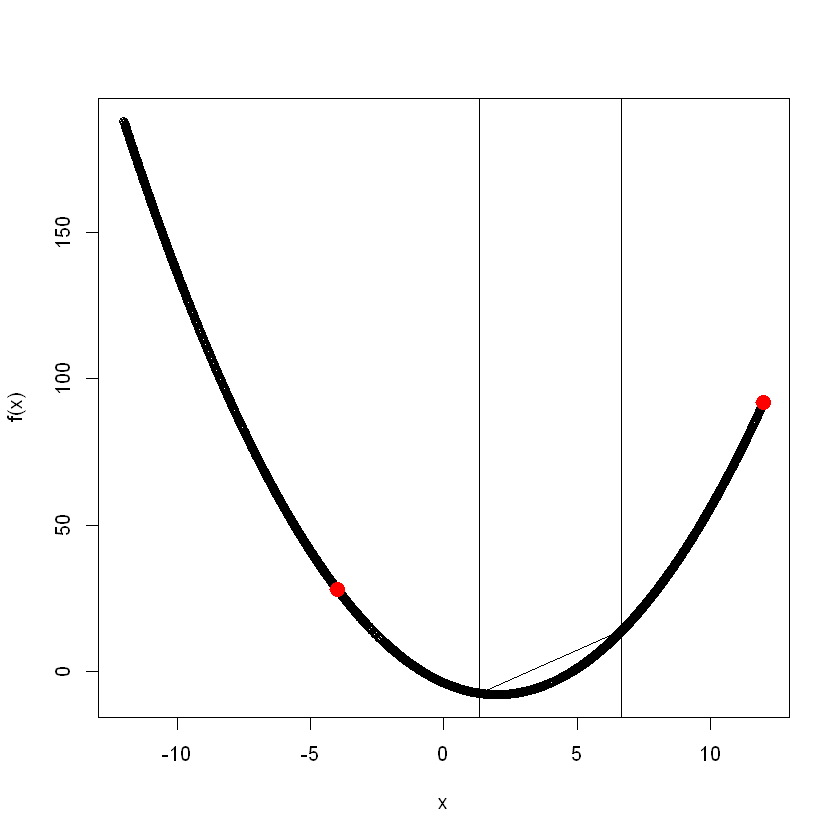

In [363]:
draw_iteration_ternary(2)

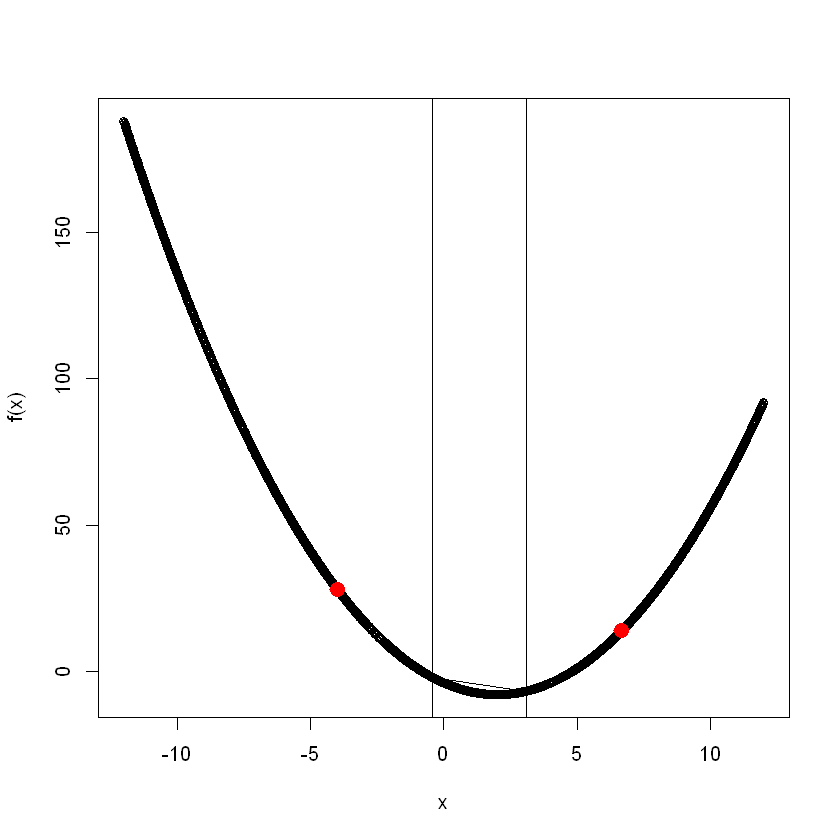

In [364]:
draw_iteration_ternary(3)

Podsumowanie metody:
1. W jednym kroku algorytmu badany przedział jest skracany o 1/3. 
2. W takim razie po n krokach procedury oryginalna długość przedziału zmniejszona jest $1,5^n$ razy.
3. W takiej sytuacji oszacowanie wartości funkcji f jest wywołane jest 2n razy.
4. Można więc powiedzieć, że jedno oszacowanie wartości funkcji pozwala średnio na
zmniejszenie długości przedziału $\sqrt(\frac{3}{2}) \approx 1.22$ razy.

# Przeszukiwanie - metoda złotego podziału

### Rozwiązanie odpowiednie dla funkcji unimodalnych

In [365]:
golden <- function(f, lower, upper, tol) {
    
    brackets<-c()
    x_pairs<-c()
    
    x1 <- (golden_ratio-1) * lower +(2-golden_ratio) *upper #Punkt w 0,381966 przedziału, patrząc od lower do upper
    f.x1 <- f(x1)
    
    while (abs(upper - lower) > 2 * tol) { 
        brackets<-c(brackets,c(lower,upper))
        x2 <- (2 - golden_ratio) *lower + (golden_ratio-1) * upper #Punkt w 0.618033 przedziału, patrząc od lower do upper
        f.x2 <- f(x2) #zauważ że w pętli wartość funkcji liczona jest jeden raz 
        x_pairs<-c(x_pairs,c(x1,x2))
        
        if (f.x1 < f.x2){ 
            upper <- lower
            lower <- x2
            }
        
        else { 
            lower <- x1 
            x1 <- x2
            f.x1 <- f.x2
            }
    }
    
    optim_point<-((upper + lower) / 2)
    result<-list("optim_point"=optim_point,"brackets"=brackets,"x_pairs"=x_pairs)
    return(result)
}

In [366]:
draw_iteration_golden<-function(n){
    x<-seq(lower,upper,0.01)
    plot(x,f(x),lwd=0.01) 
    abline(v=result_golden[[3]][n*2-1])
    text(result_golden[[3]][n*2-1],max(f(x))*0.8,"x1")
    abline(v=result_golden[[3]][n*2])
    text(result_golden[[3]][n*2],max(f(x))*0.8,"x2")
    points(result_golden[[2]][n*2-1],f(result_golden[[2]][n*2-1]),col="red",lwd=7)
    text(result_golden[[2]][n*2-1],f(result_golden[[2]][n*2-1])+max(f(x))*0.03,"lower")
    points(result_golden[[2]][n*2],f(result_golden[[2]][n*2]),col="red",lwd=7)
    text(result_golden[[2]][n*2],f(result_golden[[2]][n*2])+max(f(x))*0.03,"upper")
    segments(result_golden[[3]][n*2-1],f(result_golden[[3]][n*2-1]),result_golden[[3]][n*2],f(result_golden[[3]][n*2]))
}

### Przykład działania metody złotego podziału

In [367]:
result_golden=golden(f,lower,upper,tol)
result_golden

$optim_point
[1] 2.000284

$brackets
 [1] -12.0000000  12.0000000  -2.8328157  12.0000000   6.3343685  -2.8328157
 [7]   0.6687371   6.3343685   4.1702899   0.6687371   2.8328157   0.6687371
[13]   1.4953416   2.8328157   2.3219461   1.4953416   1.8110764   2.3219461
[19]   2.1268112   1.8110764   1.9316764   2.1268112   2.0522763   1.9316764
[25]   1.9777414   2.0522763   2.0238065   1.9777414   2.0062112   1.9777414
[31]   1.9886159   2.0062112   1.9953367   2.0062112   2.0020576   1.9953367
[37]   1.9979039   2.0020576   1.9994904   2.0020576

$x_pairs
 [1] -2.8328157  2.8328157  2.8328157  6.3343685  2.8328157  0.6687371
 [7]  2.8328157  4.1702899  2.8328157  2.0062112  2.0062112  1.4953416
[13]  2.0062112  2.3219461  2.0062112  1.8110764  2.0062112  2.1268112
[19]  2.0062112  1.9316764  2.0062112  2.0522763  2.0062112  1.9777414
[25]  2.0062112  2.0238065  2.0062112  1.9953367  1.9953367  1.9886159
[31]  1.9953367  1.9994904  1.9994904  2.0020576  1.9994904  1.9979039
[37]  1.9994904  2.0004710  2.0004710  2.0010770

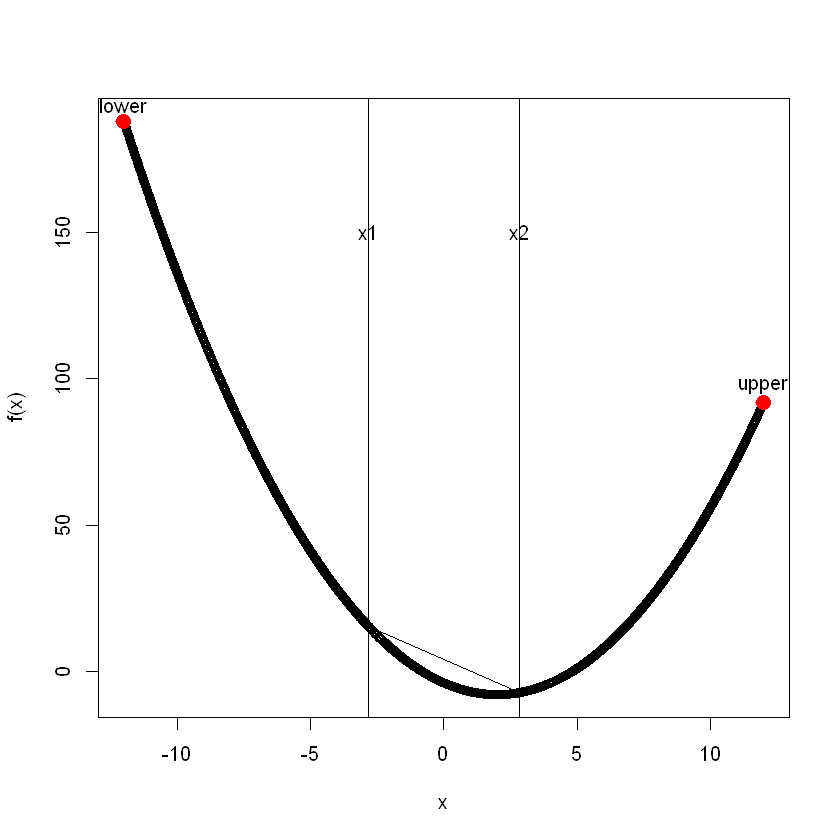

In [368]:
draw_iteration_golden(1)

Wartość funkcji w x1 jest wyższa niż w x2. Przedział lower skracany jest do wartości x1, a x1 przyjmuje wartość x2. W trakcie kolejnej pętli tworzymy nowy punkt x2 w 0.618033 przedziału od lower do upper. Efekt poniżej:

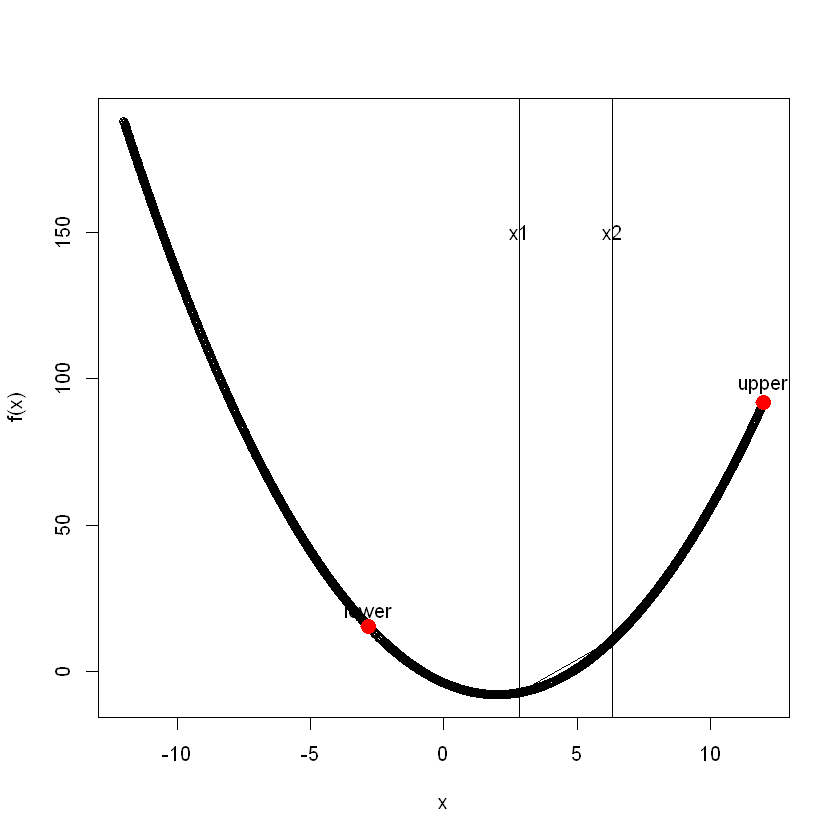

In [369]:
draw_iteration_golden(2)

Wartość funkcji w x1 jest niższa niż w x2. Punkt upper przyjmuje wartość punktu lower. Punkt lower przyjmuje wartość punktu x2. W trakcie kolejnej pętli tworzymy nowy punkt x2 w 0.618033 przedziału, patrząc od lower do upper. Efekt poniżej:

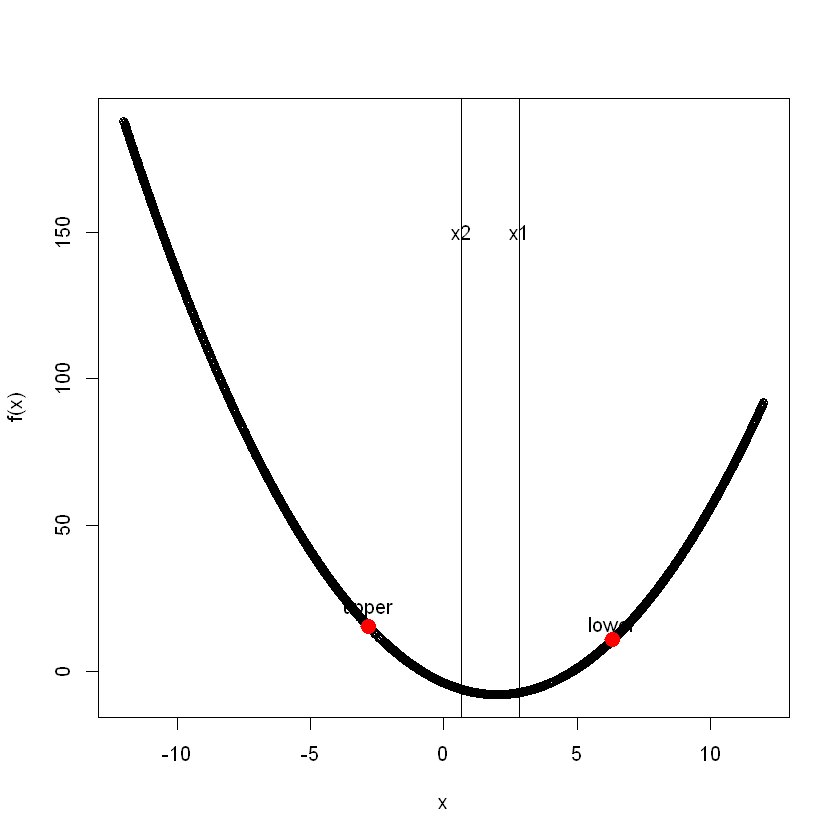

In [370]:
draw_iteration_golden(3)

Podsumowanie metody:
1. Po n krokach procedury oryginalna długość przedziału zmniejszona jest $1,62^n$ razy.
2. Oszacowanie wartości funkcji $f$ jest wywołane jest $n$ razy.
3. Porównajmy szybkość przeszukiwania potrójnego z przeszukiwaniem według złotego podziału. Zauważmy, że $1,62 > 1,5$. W takim razie przeszukiwanie potrójne jest ponad dwa razy wolniejsze, ponieważ wymaga dwóch oszacowań wartości funkcji w każdym kroku. Na przykład w celu osiągnięcia skrócenia inicjalnego przedziału $1.5^{19} \approx 2217$ razy przeszukiwanie potrójne wymaga $19*2 = 38$ oszacowań wartości funkcji. Z kolei przeszukiwanie według złotego podziału dla osiągnięcia skrócenia przedziału $16*2207$ razy wymaga 16 oszacowań.

# Metoda bisekcji

Powyżej przedstawione metody wykorzystywały jedynie wartości funkcji do poszukiwania jej minimum lokalnego. Przejdźmy teraz do omówienia tzw. algorytmów gradientowych, które wykorzystują informację o pochodnych minimalizowanej funkcji f. W oczywisty sposób ograniczeniem tych metod jest konieczność spełnienia warunku różniczkowalności przez badaną funkcję.

In [371]:
bisection <- function(df, lower, upper, tol) {
    
    m_points_bisection<-c()
    brackets_bisection<-c(lower,upper)
    
    while (upper - lower > 2 * tol) {
        
        m <- (lower + upper) / 2 #rozważamy punkt m pośrodku analizowanego przedziału
        df.m <- df(m)
        
        while (df.m == 0) {
            m <- (lower + upper) / 2 + runif(1, -tol, tol) 
            df.m <- f(m)
        }
        
        m_points_bisection<-c(m_points_bisection,c(m))
        
        if (df.m < 0) { #jeżeli pochodna w m jest mniejsza od zera, to dolna granica przedziału przyjmuje jego wartość
            lower <- m
            brackets_bisection<-c(brackets_bisection,c(lower,upper))
        } else {
            upper <- m  #jeżeli pochodna w m jest większa niż zero, to górna granica przedziału przyjmuje jego wartość
            brackets_bisection<-c(brackets_bisection,c(lower,upper))
        }
        
    }
    optim_point<-(upper + lower) / 2
    result<-list("optimal point"=optim_point,"m points"=m_points_bisection,"brackets"=brackets_bisection)
    return(result)
}

In [372]:
draw_iteration_bisection<-function(n){
    x<-seq(lower,upper,0.01)
    plot(x,df(x),col="red") 
    lines(x,f(x),col="black") 
    points(result[[2]][n],df(result[[2]][n]),col="blue",lwd=7)
    text(result[[2]][n],df(result[[2]][n])+max(f(x))*0.02,"m")
    points(result[[3]][n*2],df(result[[3]][n*2]),col="black",lwd=7)
    points(result[[3]][n*2-1],df(result[[3]][n*2-1]),col="black",lwd=7)
    abline(h=0,col="green")
    legend("topleft", legend=c("f_1", "df_1"),
       col=c("black", "red"), lty=1:1, cex=1.5)
    grid()
}

### Przykład działania metody bisekcji

In [373]:
result<-bisection(df,lower,upper,tol)
result

$`optimal point`
[1] 2.000244

$`m points`
 [1] 0.000000 6.000000 3.000000 1.500000 2.250000 1.875000 2.062500 1.968750
 [9] 2.015625 1.992188 2.003906 1.998047 2.000977 1.999512

$brackets
 [1] -12.000000  12.000000   0.000000  12.000000   0.000000   6.000000
 [7]   0.000000   3.000000   1.500000   3.000000   1.500000   2.250000
[13]   1.875000   2.250000   1.875000   2.062500   1.968750   2.062500
[19]   1.968750   2.015625   1.992188   2.015625   1.992188   2.003906
[25]   1.998047   2.003906   1.998047   2.000977   1.999512   2.000977

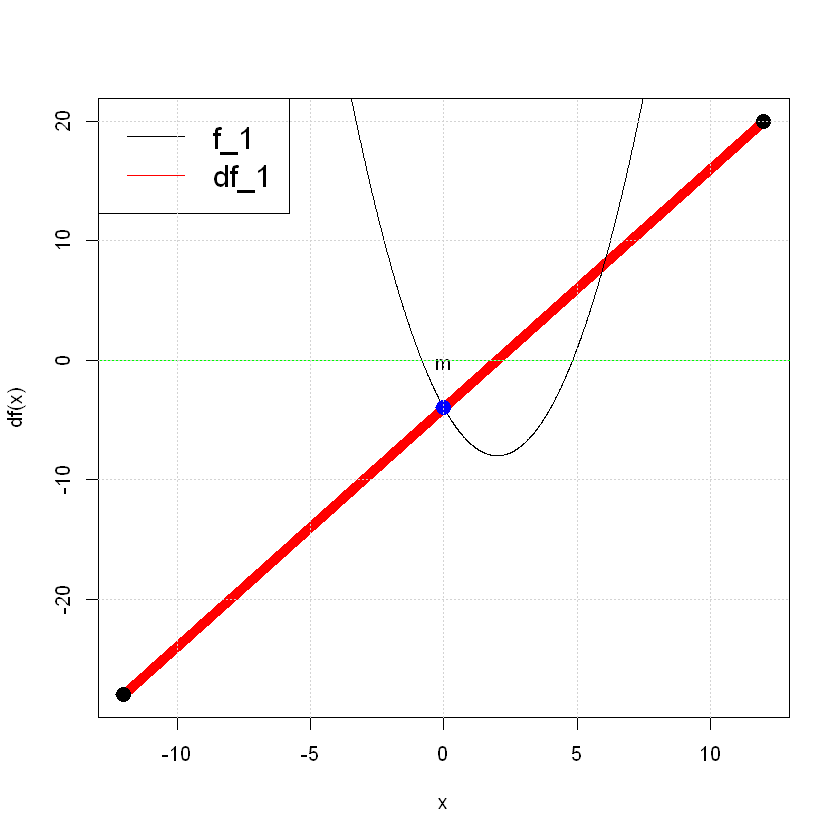

In [374]:
draw_iteration_bisection(1)

Pochodna w punkcie m jest niższa od zera. Dolna granica analizowanego przedziału przyjmuje wartość punktu m.

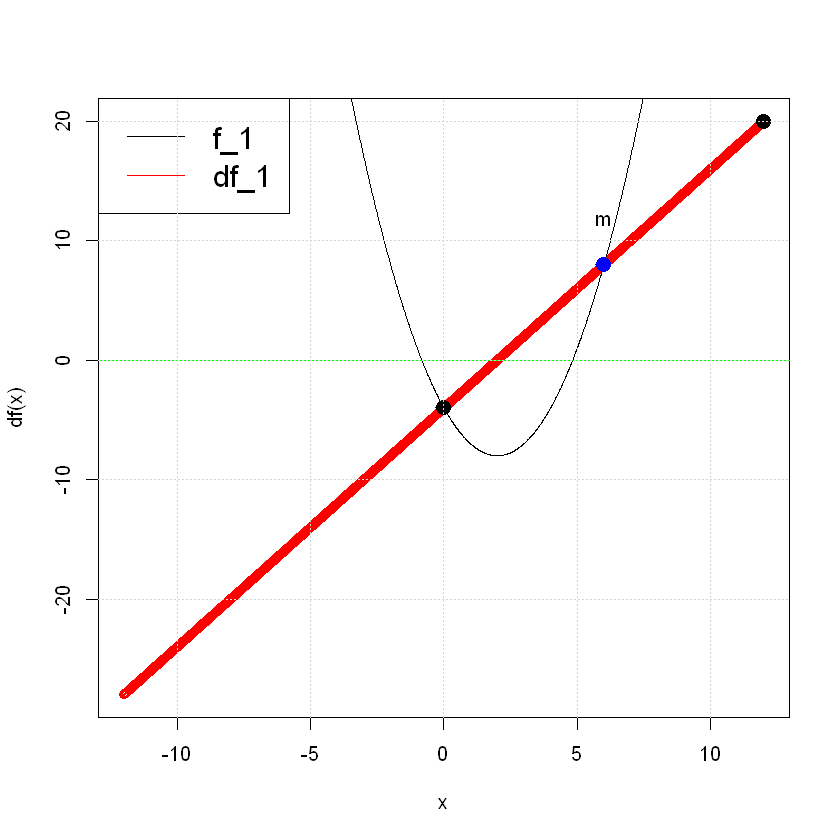

In [375]:
draw_iteration_bisection(2)

Pochodna w punkcie m jest większa od zera. Górna granica analizowanego przedziału przyjmuje wartość punktu m.

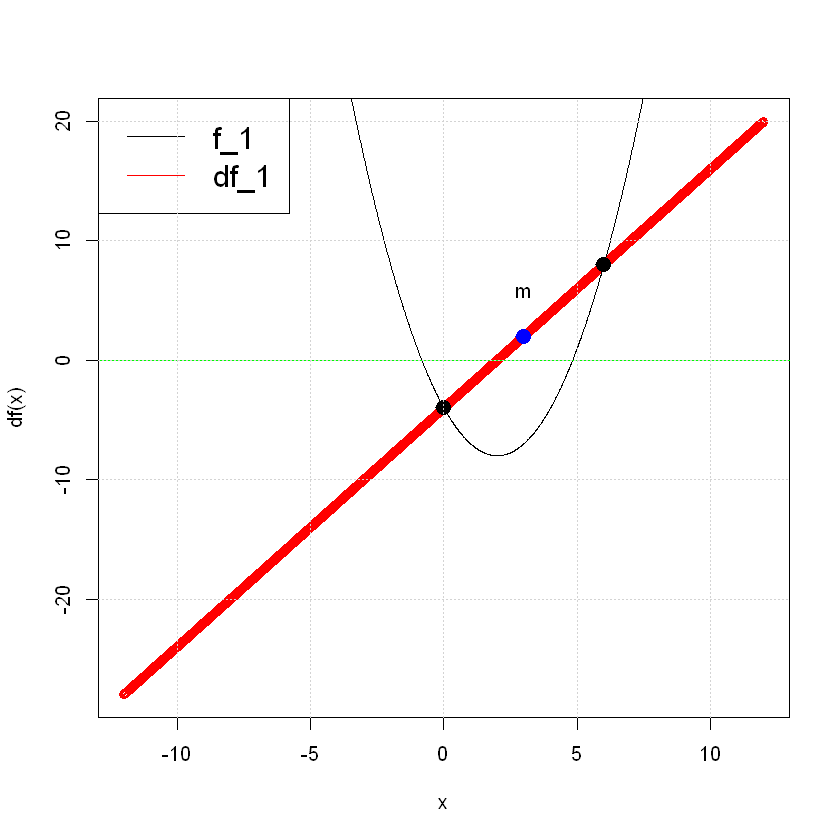

In [376]:
draw_iteration_bisection(3)

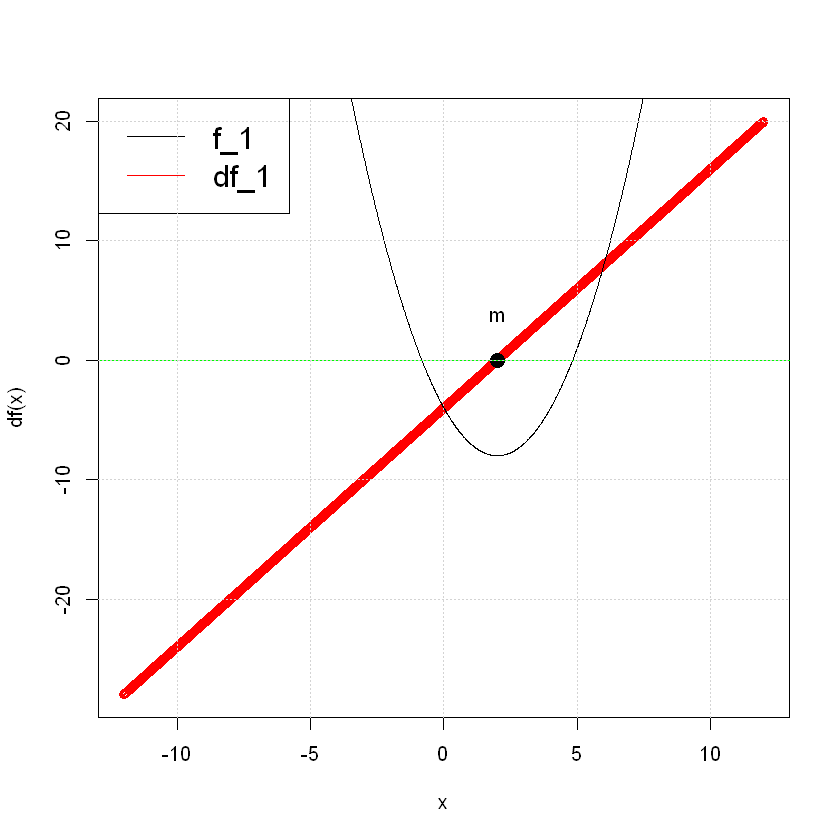

In [377]:
draw_iteration_bisection(14)

Warto zwrócić uwagę na fakt, że algorytm ten w każdym kroku dwukrotnie zmniejsza długość przeszukiwanego przedziału. <br>
W związku z tym wydaje się on być szybszy niż algorytm złotego podziału. <br>
Jednak jego praktyczna szybkość zależy od kosztu wyznaczenia wartości pochodnej $f'(x)$ w punkcie w stosunku do kosztu wyliczenia wartości $f(x)$. <br>
Jeśli jest on porównywalny, to metoda bisekcji będzie bardziej efektywna. Z kolei jeżli np. pochodna jest wyznaczana numerycznie, co wymaga przynajmniej dwóch oszacowań funkcji f to metoda złotego podziału jest bardziej efektywna.

# Algorytm Newtona

Algorytm Newtona opiera się na analizie funkcji przybliżonej za pomocą wzoru Taylora. Ta aproksymacja pozwala nam na łatwe obliczeniowo znalezienie kroku h takiego aby pochodna tego przybliżenia w docelowym punkcie była równa zero. 

Możemy przedstawić nasz problem analogicznie jak w przypadku metody bisekcji - znalezienia miejsca w którym zeruje się pochodna. Naszą funkcję możemy przybliżyć do postaci:

$f(x+h)\approx f(x)+f'(x)*h+\frac{1}{2}f''(x)h^2$

Zauważmy że jest to funkcja kwadratowa, możemy zauważyć jej podobieństwo do postaci $f(h)=c+bh+ah^2$.
Funkcja kwadratowa takiej postaci posiada wierzchołek paraboli w punkcie $\frac{-b}{2a}$. Oznacza to że pochodna naszego przybliżenia będzie zerowa jeżeli zrobimy krok o długości $h=-\frac{f'(x)}{f''(x)}$. Z tego wiemy, że kolejny punkt, $x(k+1)$, powinien przyjąć wartość $x-\frac{f'(x)}{f''(x)}$

Minimum przybliżenia naszej funkcji staje się naszym kolejnym punktem do analizy. 

Warto zwrócić uwagę na fakt, że metoda ta podobnie jak algorytm bisekcji nie korzysta z informacji o wartości badanej funkcji. Punkt, którego poszukujemy to miejsce zerowe pochodnej funkcji f. W szczególności oznacza to, że zwrócona aproksymacja może przybliżać maksimum (jeśli druga pochodna jest ujemna) lub punkt przegięcia (druga pochodna równa 0) badanej funkcji. Z kolei zaletą algorytmu Newtona jest jego szybkość zbieżności.

In [378]:
newton <- function(df, d2f, x, tol, max_iters=Inf) {
counter<-0
xes<-c(x)

    repeat {
            if(counter<max_iters){
                new.x <- x - df(x) / d2f(x)
                xes<-c(xes,c(new.x))
                if (abs(new.x - x) < tol) {
                    result_newton<-list("optimal_point"=new.x,"values"=xes)
                    return(result_newton)
                }

                x <- new.x
                counter=counter+1
            }else{
                result_newton<-list("optimal_point"=new.x,"values"=xes)
                return(result_newton)
                }
            }
}

In [379]:
taylor_approx<-function(func,eval_point,step){
    df1<-Deriv(func,"x")
    df2<-Deriv(df1,"x")
    return(func(eval_point)+df1(eval_point)*(step-eval_point)+0.5*df2(eval_point)*(step-eval_point)^2)
    }

draw_iteration_newton<-function(n,rightlim,leftlim){
    x<-seq(rightlim,leftlim,0.001)
    plot(x,f_1(x),col="green",ylim=c(-1.5, 1.5)) 
    lines(x,taylor_approx(f_1,result_newton[[2]][n],x),col="blue") ################
    #lines(x,df_1(x),col="red") ################
    segments(result_newton[[2]][n],0,result_newton[[2]][n],f_1(result_newton[[2]][n]),col="black")
    points(result_newton[[2]][n],0,col="red",lwd=7)
    points(result_newton[[2]][n+1],0,col="black",lwd=7)
    text(result_newton[[2]][n],0.1,"x")
    text(result_newton[[2]][n+1],0.2,"new.x")
    segments(result_newton[[2]][n+1],0,result_newton[[2]][n+1],taylor_approx(f_1,result_newton[[2]][n],result_newton[[2]][n+1]),col="black")
    #legend("topleft", legend=c("f_1", "df_1","taylor approx"),
    #   col=c("green", "red","blue"), lty=1:1:1, cex=1.5)
    legend("topleft", legend=c("f_1", "taylor approx"),
       col=c("green", "blue"), lty=1:1, cex=1.5)
    grid()
}

### Przypadek 1, zbieżny

In [380]:
result_newton<-newton(df_1, d2f_1, 0.4, tol)
result_newton

$optimal_point
[1] 4.150944e-16

$values
[1]  4.000000e-01 -1.882353e-01  1.435669e-02 -5.920688e-06  4.150944e-16

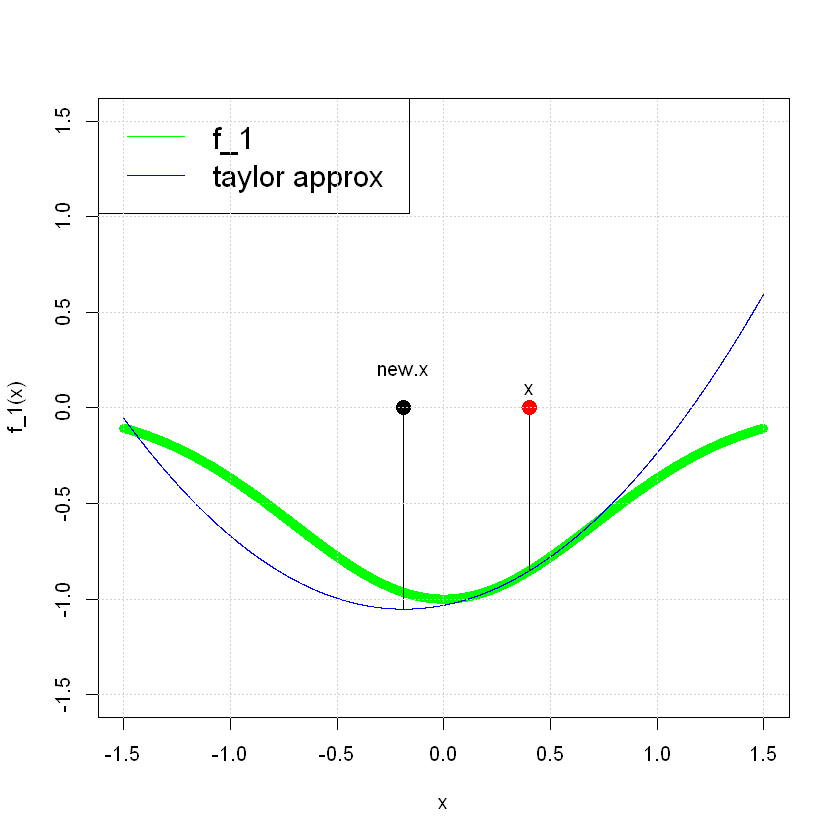

In [381]:
draw_iteration_newton(1,-1.5,1.5)

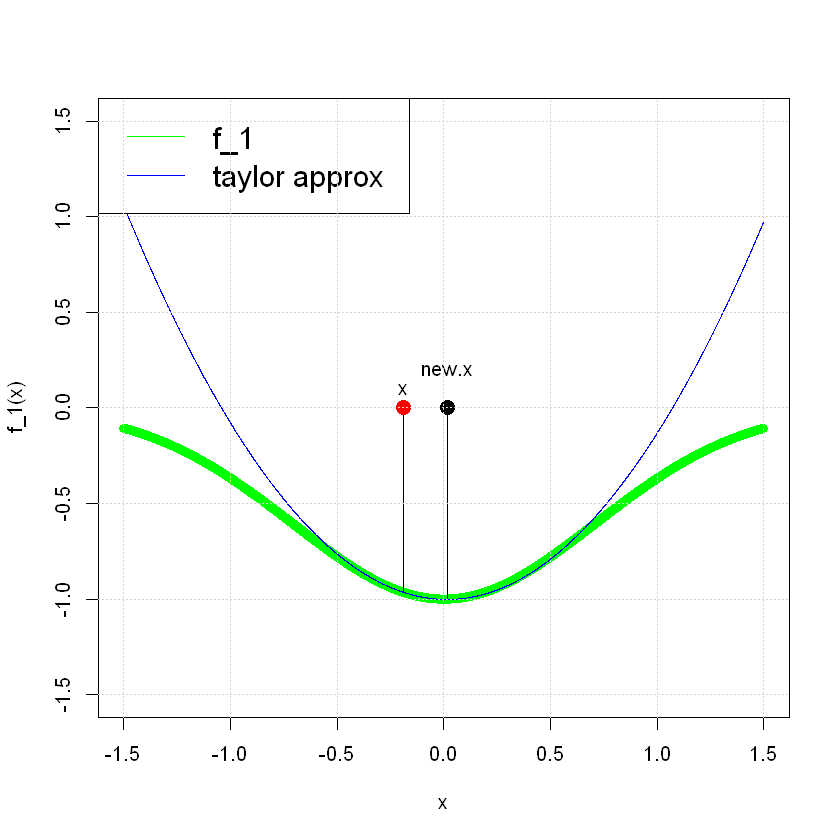

In [382]:
draw_iteration_newton(2,-1.5,1.5)

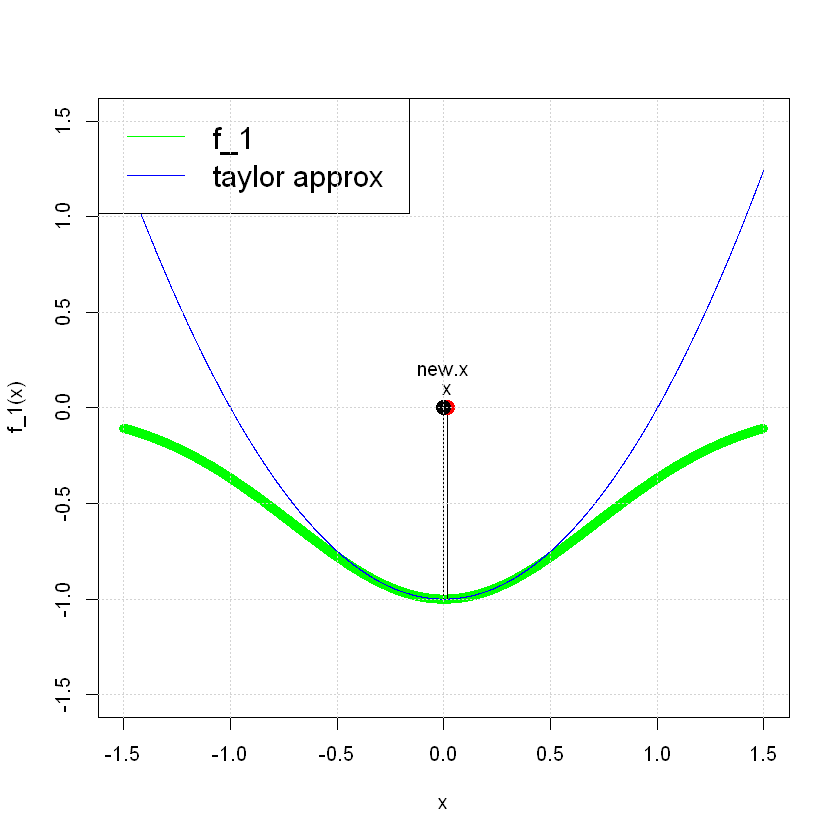

In [383]:
draw_iteration_newton(3,-1.5,1.5)

### Przypadek 2, nieskończona pętla

In [384]:
result_newton<-newton(df_1, d2f_1, 0.5, tol,max_iters=5)
result_newton

$optimal_point
[1] -0.5

$values
[1]  0.5 -0.5  0.5 -0.5  0.5 -0.5

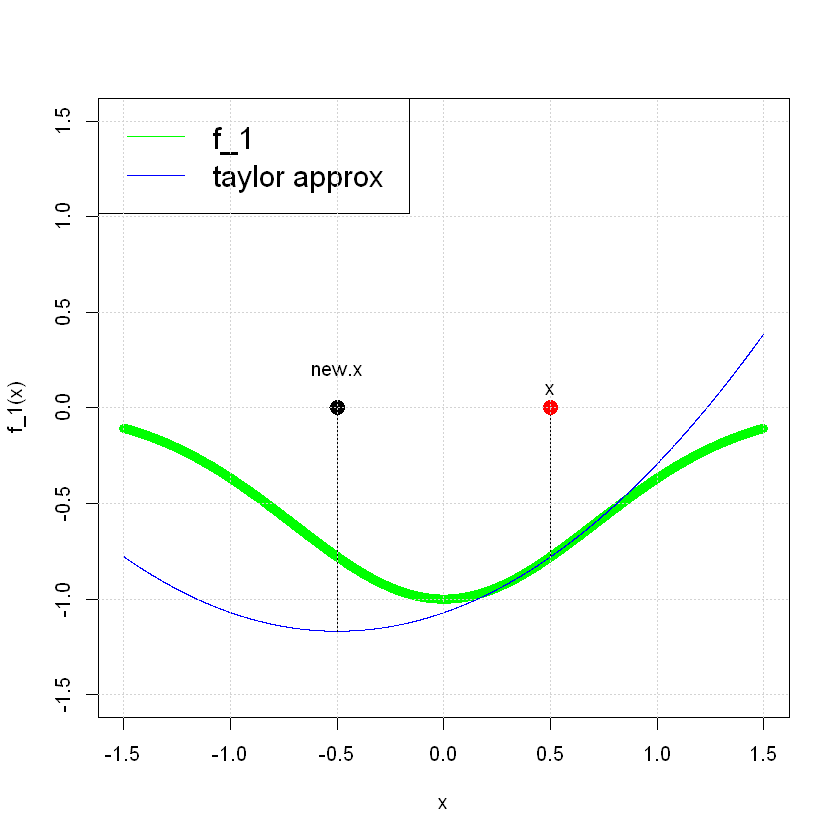

In [385]:
draw_iteration_newton(1,-1.5,1.5)

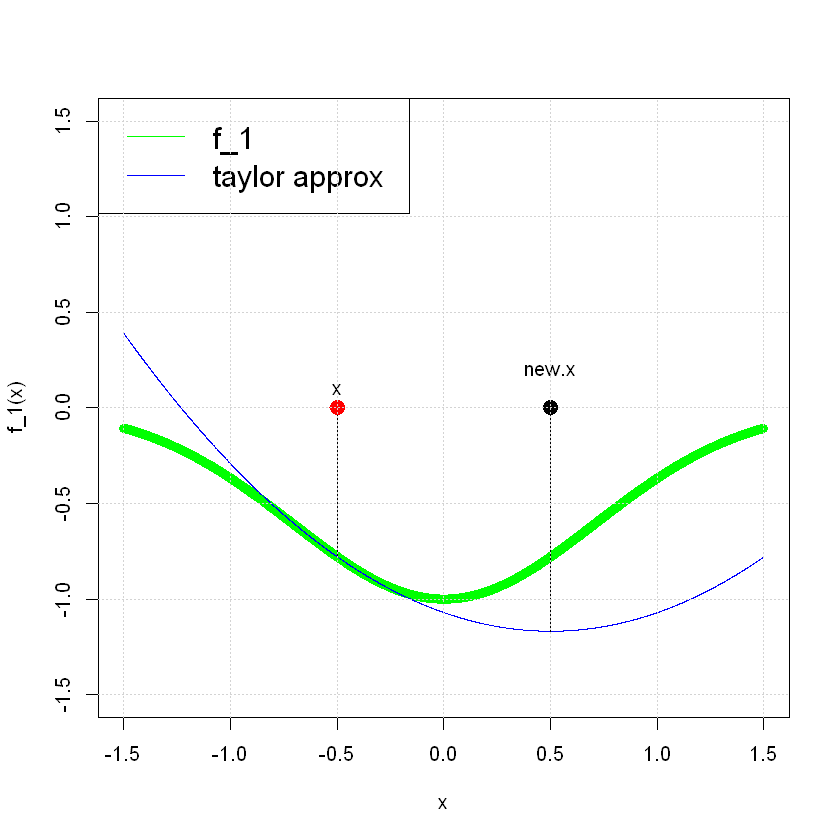

In [386]:
draw_iteration_newton(2,-1.5,1.5)

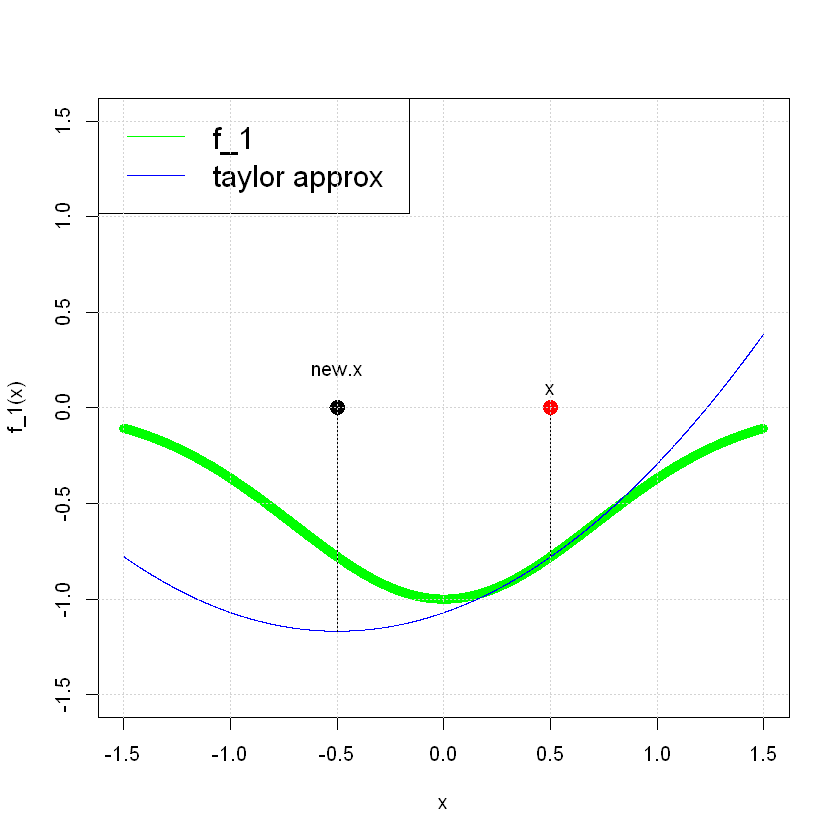

In [387]:
draw_iteration_newton(3,-1.5,1.5)

### Przypadek 3, rozbieżny

In [388]:
result_newton<-newton(df_1, d2f_1, 1, tol,max_iters=739)
result_newton

$optimal_point
[1] 27.31319

$values
  [1]  1.000000  2.000000  2.285714  2.527615  2.742226  2.937546  3.118226
  [8]  3.287266  3.446747  3.598185  3.742726  3.881263  4.014510  4.143046
 [15]  4.267351  4.387828  4.504817  4.618614  4.729470  4.837607  4.943220
 [22]  5.046482  5.147545  5.246547  5.343611  5.438848  5.532360  5.624238
 [29]  5.714567  5.803423  5.890877  5.976995  6.061837  6.145458  6.227910
 [36]  6.309243  6.389499  6.468723  6.546953  6.624226  6.700576  6.776037
 [43]  6.850639  6.924411  6.997380  7.069572  7.141013  7.211724  7.281729
 [50]  7.351047  7.419700  7.487706  7.555083  7.621848  7.688019  7.753610
 [57]  7.818637  7.883114  7.947055  8.010474  8.073382  8.135793  8.197717
 [64]  8.259167  8.320153  8.380685  8.440774  8.500429  8.559659  8.618474
 [71]  8.676882  8.734892  8.792511  8.849748  8.906610  8.963104  9.019238
 [78]  9.075018  9.130450  9.185543  9.240300  9.294730  9.348837  9.402627
 [85]  9.456106  9.509280  9.562152  9.614729  9.667016  9.719016  9.770735
 [92]  9.822178  9.873348  9.924251  9.974890 10.025269 10.075392 10.125263
 [99] 10.174887 10.224266 10.273404 10.322305 10.370972 10.419409 10.467619
[106] 10.515604 10.563368 10.610915 10.658246 10.705366 10.752276 10.798980
[113] 10.845480 10.891779 10.937879 10.983784 11.029495 11.075015 11.120346
[120] 11.165491 11.210453 11.255232 11.299832 11.344254 11.388501 11.432575
[127] 11.476478 11.520211 11.563777 11.607178 11.650415 11.693491 11.736407
[134] 11.779164 11.821766 11.864212 11.906506 11.948649 11.990641 12.032486
[141] 12.074184 12.115738 12.157147 12.198415 12.239542 12.280530 12.321380
[148] 12.362094 12.402673 12.443119 12.483432 12.523614 12.563666 12.603590
[155] 12.643386 12.683057 12.722602 12.762024 12.801324 12.840502 12.879559
[162] 12.918498 12.957318 12.996022 13.034609 13.073082 13.111441 13.149687
[169] 13.187821 13.225844 13.263757 13.301561 13.339257 13.376846 13.414329
[176] 13.451706 13.488979 13.526149 13.563215 13.600180 13.637044 13.673808
[183] 13.710472 13.747038 13.783506 13.819877 13.856152 13.892331 13.928415
[190] 13.964406 14.000303 14.036108 14.071821 14.107443 14.142975 14.178417
[197] 14.213769 14.249034 14.284211 14.319300 14.354303 14.389221 14.424053
[204] 14.458801 14.493465 14.528046 14.562544 14.596959 14.631294 14.665547
[211] 14.699720 14.733813 14.767827 14.801762 14.835619 14.869399 14.903101
[218] 14.936727 14.970276 15.003751 15.037150 15.070474 15.103725 15.136902
[225] 15.170006 15.203038 15.235997 15.268885 15.301702 15.334448 15.367124
[232] 15.399730 15.432267 15.464734 15.497134 15.529465 15.561729 15.593925
[239] 15.626055 15.658119 15.690116 15.722048 15.753915 15.785717 15.817455
[246] 15.849129 15.880740 15.912287 15.943771 15.975193 16.006553 16.037852
[253] 16.069089 16.100265 16.131380 16.162435 16.193430 16.224366 16.255243
[260] 16.286060 16.316819 16.347520 16.378163 16.408749 16.439277 16.469748
[267] 16.500163 16.530521 16.560824 16.591071 16.621262 16.651399 16.681481
[274] 16.711508 16.741481 16.771400 16.801266 16.831079 16.860838 16.890545
[281] 16.920199 16.949801 16.979352 17.008850 17.038298 17.067694 17.097040
[288] 17.126334 17.155579 17.184774 17.213919 17.243014 17.272060 17.301057
[295] 17.330006 17.358905 17.387757 17.416560 17.445316 17.474024 17.502685
[302] 17.531299 17.559866 17.588386 17.616860 17.645288 17.673669 17.702005
[309] 17.730296 17.758541 17.786741 17.814897 17.843007 17.871074 17.899096
[316] 17.927074 17.955008 17.982898 18.010746 18.038550 18.066311 18.094029
[323] 18.121705 18.149338 18.176929 18.204478 18.231986 18.259451 18.286875
[330] 18.314258 18.341600 18.368901 18.396162 18.423381 18.450561 18.477700
[337] 18.504800 18.531859 18.558879 18.585859 18.612801 18.639703 18.666566
[344] 18.693390 18.720176 18.746923 18.773632 18.800303 18.826936 18.853531
[351] 18.880089 18.906609 18.933092 18.959538 18.985946 19.012318 19.038653
[358] 19.064952 19.091214 19.117440 19.143630 19.169784 19.195902 19.221985
[365] 19.24

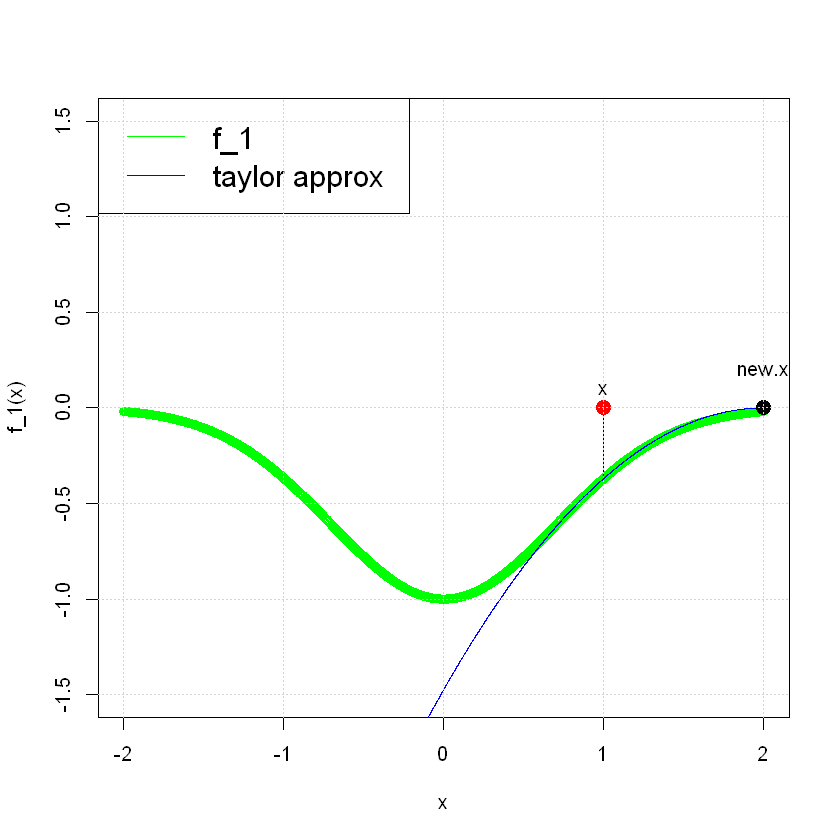

In [389]:
draw_iteration_newton(1,-2,2)

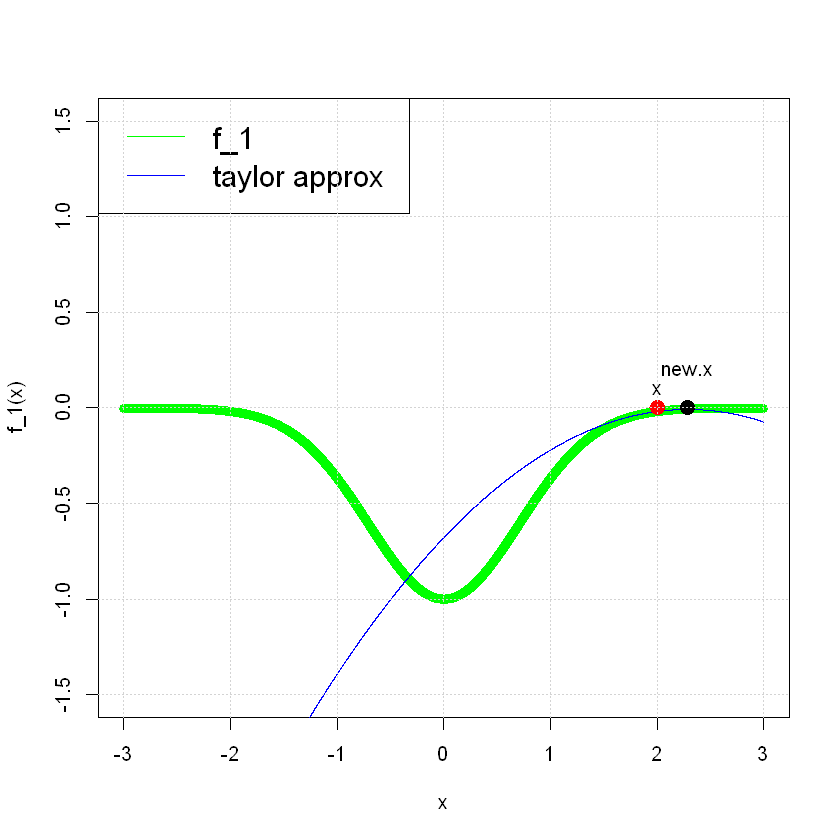

In [390]:
draw_iteration_newton(2,-3,3)

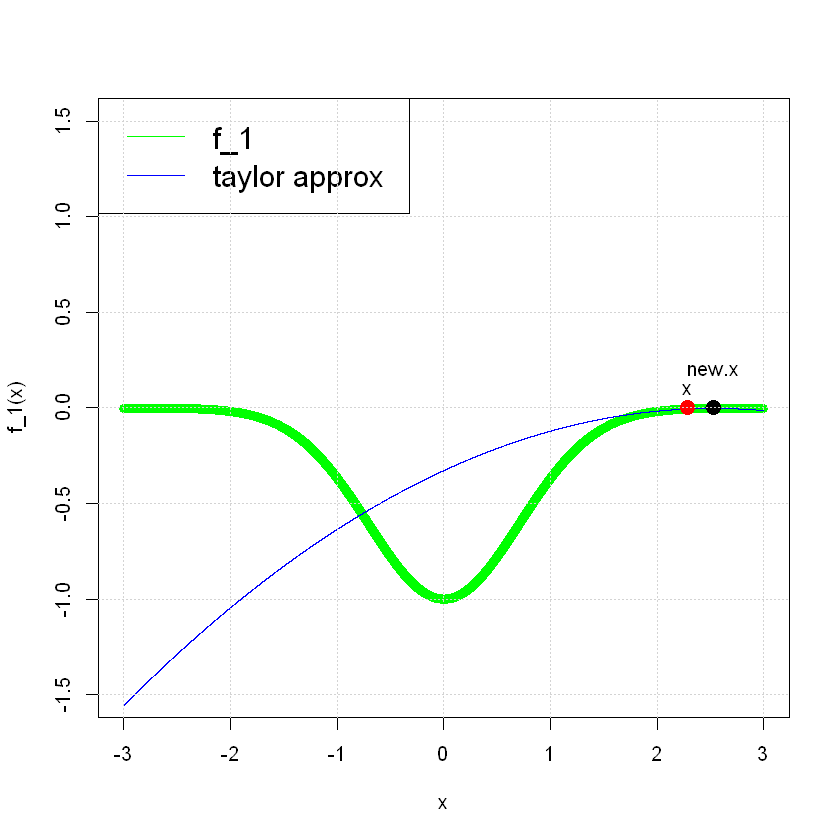

In [391]:
draw_iteration_newton(3,-3,3)

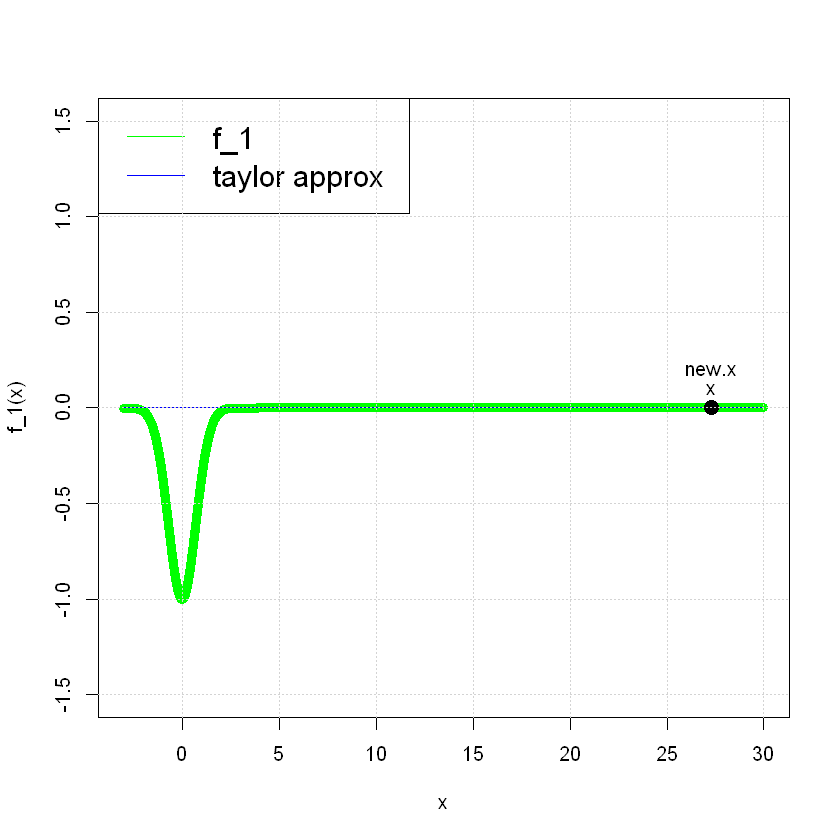

In [392]:
draw_iteration_newton(739,-3,30)

In [393]:
newton_func<-function(x){
   return(x - df_1(x) / d2f_1(x))
} 

In [394]:
newton_func(27.2950613531683)

[1] 27.31319

In [395]:
newton_func(27.3131943283194)

[1] NaN

In [396]:
df_1(27.3131943283194) / d2f_1(27.3131943283194)

[1] NaN

In [397]:
d2f_1(27.3131943283194)

[1] 0

# Metoda siecznych

Metoda siecznych pozwala na uniknięcie konieczności wyznaczania drugiej pochodnej funkcji. Metoda siecznych ma na celu wyeliminowanie w równaniu $x(k+1) = x(k)-\frac{f'(x(k))}{f''(x(k))}$ konieczności wyznaczania wartości $f''(x(k))$. Jeżeli dysponujemy dwoma punktami oraz wartościami pochodnej minimalizowanej funkcji w tych punktach,
$f''(x(k))$ można przybliżyć za pomocą współczynnika kierunkowego siecznej przechodzącej przez oba punkty.
Wtedy $f''(x)\approx\frac{f'(x(k))-f'(x(k-1))}{x(k)-x(k-1)}$, a krok $h$ wynosi $-f'(x(k))*\frac{x(k)-x(k-1)}{f'(x(k))-f'(x(k-1))}$ <br>
<br>
Zwróćmy uwagę, że kod wykorzystuje tylko pierwszą pochodną funkcji w procesie optymalizacji. Z drugiej strony w celu rozpoczęcia optymalizacji niezbędne jest podanie dwóch punktów startowych. Zwróćmy uwagę, że metoda siecznych charakteryzuje się podobnymi problemami ze zbieżnością jak metoda Newtona.

In [398]:
secant <- function(df, x1, x2, tol) {
    points_secant<-c()
    df.x2 <- df(x2)
    repeat {
        df.x1 <- df(x1)
        points_secant<-c(points_secant,c(x1,x2))
        new.x <- x1 - df.x1 * (x1 - x2) / (df.x1 - df.x2)
        if (abs(new.x - x1) < tol) {
            result_secant<-list("optim_point"=new.x,"points_secant"=points_secant)
            return(result_secant)
        }
        x2 <- x1
        df.x2 <- df.x1 #x2 przyjmuje wartości poprzednio posiadane przez x1. Nowy punkt staje się nowym x1
        x1 <- new.x
    }
}

In [399]:
#puscic bracketing
line_2_pts<-function(x,f,x_1,y_1,x_2,y_2){
    return((y_2-y_1)/(x_2-x_1)*x+f(x_1)-(y_2-y_1)/(x_2-x_1)*x_1)
}

draw_iteration_secant<-function(n,rightlim,leftlim){
    x<-seq(rightlim,leftlim,0.001)
    plot(x,f_1(x),col="green",ylim=c(-1, 1.5)) 
    lines(x,df_1(x),col="red") 
    lines(x,line_2_pts(x=x,
                       f=df_1,
                       x_1=result_secant[[2]][2*n-1],
                       y_1=df_1(result_secant[[2]][2*n-1]),
                       x_2=result_secant[[2]][2*n],
                       y_2=df_1(result_secant[[2]][2*n])
                      ))
    points(result_secant[[2]][2*n-1],df_1(result_secant[[2]][2*n-1]),col="red",lwd=7)
    text(result_secant[[2]][2*n-1],df_1(result_secant[[2]][2*n-1])+0.25,"x1")
    points(result_secant[[2]][2*n],df_1(result_secant[[2]][2*n]),col="red",lwd=7)
    text(result_secant[[2]][2*n],df_1(result_secant[[2]][2*n])+0.25,"x2")
    points(result_secant[[2]][2*n+1],df_1(result_secant[[2]][2*n+1]),col="black",lwd=7)
    text(result_secant[[2]][2*n+1],df_1(result_secant[[2]][2*n+1])+0.25,"new.x")
    segments(result_secant[[2]][2*n+1],df_1(result_secant[[2]][2*n+1]),result_secant[[2]][2*n+1],0,col="black")
    grid()
}

### Przypadek 1, zbieżny

In [400]:
result_secant=secant(df_1, 0.5, 0.6, 0.001) # converges
result_secant

$optim_point
[1] 3.560725e-10

$points_secant
 [1]  5.000000e-01  6.000000e-01 -8.333162e-01  5.000000e-01 -1.445368e-01
 [6] -8.333162e-01  2.105340e-01 -1.445368e-01  2.012582e-03  2.105340e-01
[11] -9.212547e-05  2.012582e-03

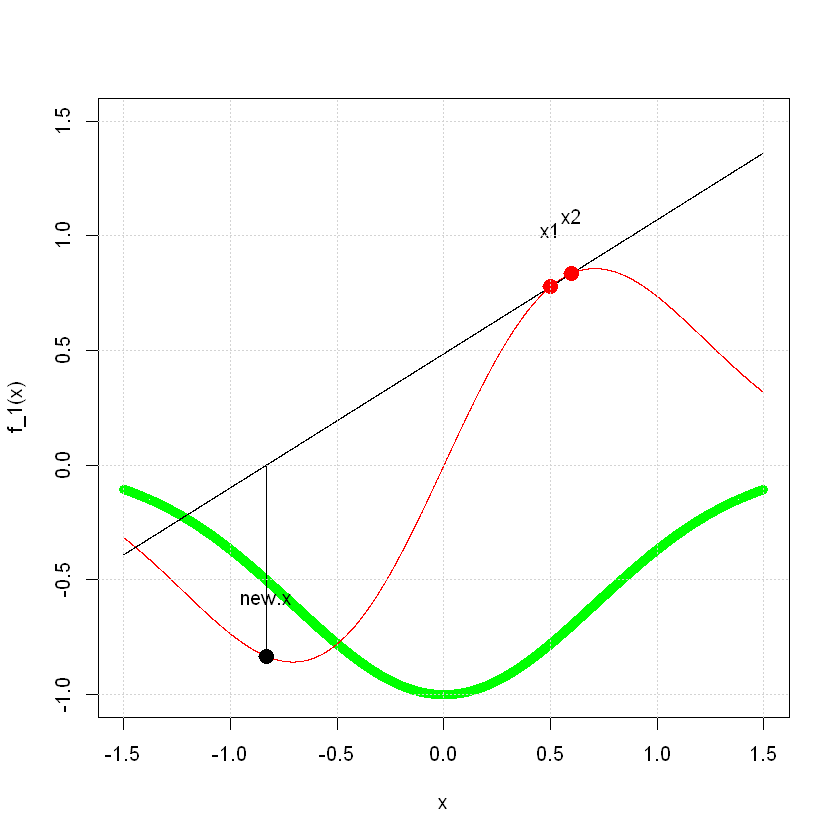

In [401]:
draw_iteration_secant(1,-1.5,1.5)

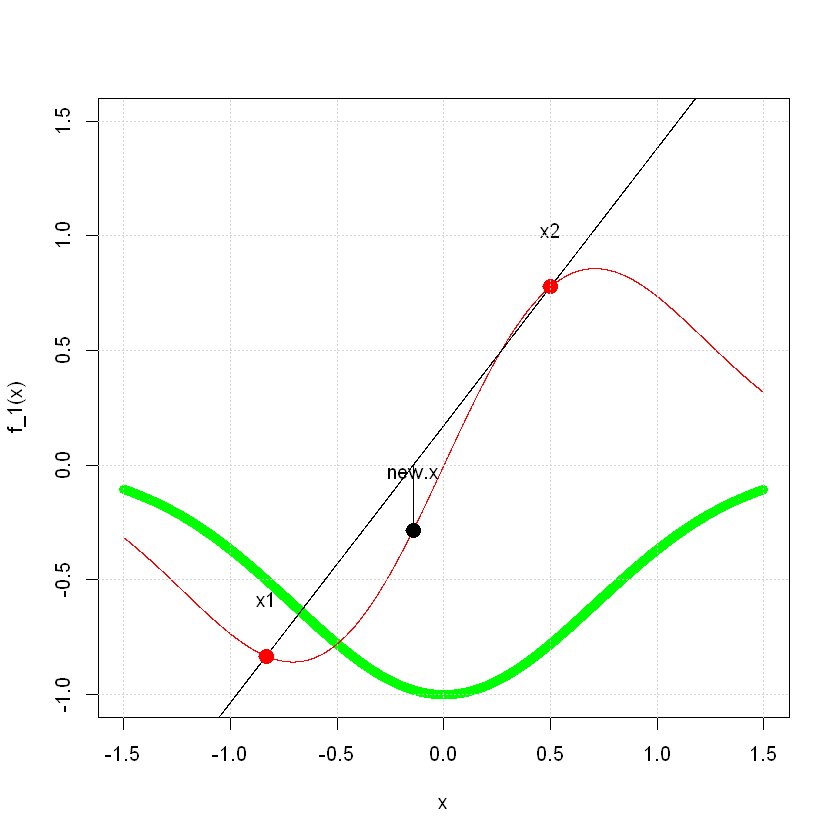

In [402]:
draw_iteration_secant(2,-1.5,1.5)

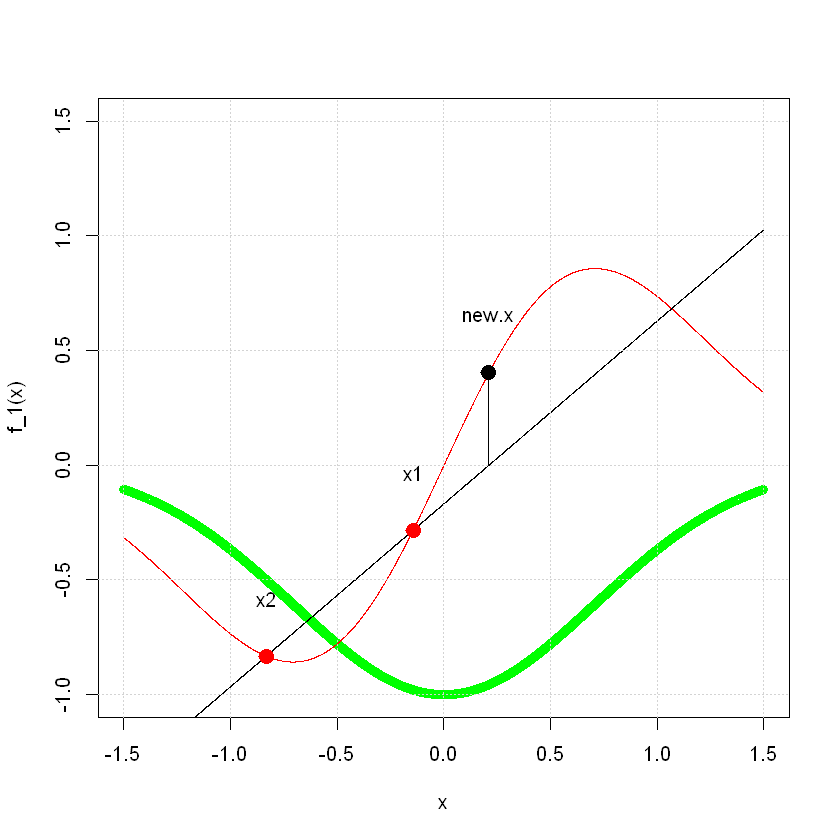

In [403]:
draw_iteration_secant(3,-1.5,1.5)

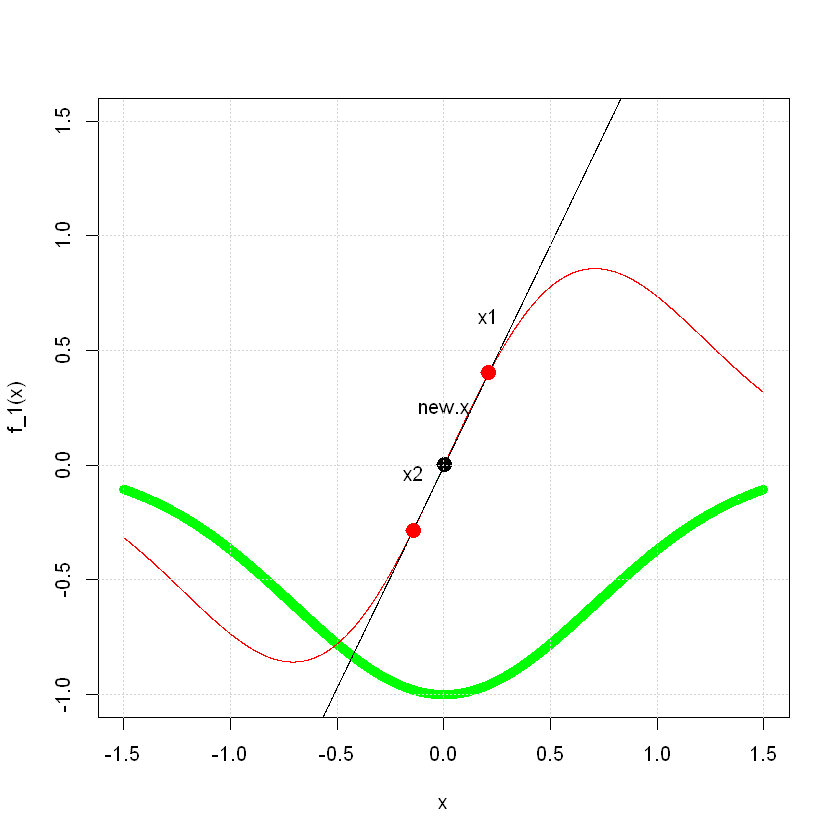

In [404]:
draw_iteration_secant(4,-1.5,1.5)

### Przypadek 2, rozbieżny

In [405]:
result_secant=secant(df_1, 1, 1.1, 0.001) # diverges
result_secant

$optim_point
[1] 27.30534

$points_secant
   [1]  1.000000  1.100000  1.922873  1.000000  2.060236  1.922873  2.284298
   [8]  2.060236  2.445795  2.284298  2.606508  2.445795  2.750843  2.606508
  [15]  2.887899  2.750843  3.016822  2.887899  3.139668  3.016822  3.256997
  [22]  3.139668  3.369620  3.256997  3.478046  3.369620  3.582744  3.478046
  [29]  3.684081  3.582744  3.782375  3.684081  3.877893  3.782375  3.970864
  [36]  3.877893  4.061487  3.970864  4.149938  4.061487  4.236369  4.149938
  [43]  4.320917  4.236369  4.403702  4.320917  4.484833  4.403702  4.564407
  [50]  4.484833  4.642514  4.564407  4.719232  4.642514  4.794636  4.719232
  [57]  4.868791  4.794636  4.941760  4.868791  5.013598  4.941760  5.084357
  [64]  5.013598  5.154086  5.084357  5.222828  5.154086  5.290627  5.222828
  [71]  5.357519  5.290627  5.423541  5.357519  5.488727  5.423541  5.553108
  [78]  5.488727  5.616714  5.553108  5.679572  5.616714  5.741709  5.679572
  [85]  5.803149  5.741709  5.863916  5.803149  5.924031  5.863916  5.983515
  [92]  5.924031  6.042389  5.983515  6.100670  6.042389  6.158377  6.100670
  [99]  6.215526  6.158377  6.272133  6.215526  6.328214  6.272133  6.383784
 [106]  6.328214  6.438855  6.383784  6.493443  6.438855  6.547558  6.493443
 [113]  6.601214  6.547558  6.654422  6.601214  6.707193  6.654422  6.759538
 [120]  6.707193  6.811467  6.759538  6.862991  6.811467  6.914118  6.862991
 [127]  6.964857  6.914118  7.015218  6.964857  7.065208  7.015218  7.114837
 [134]  7.065208  7.164111  7.114837  7.213039  7.164111  7.261627  7.213039
 [141]  7.309883  7.261627  7.357813  7.309883  7.405425  7.357813  7.452723
 [148]  7.405425  7.499715  7.452723  7.546407  7.499715  7.592803  7.546407
 [155]  7.638911  7.592803  7.684734  7.638911  7.730279  7.684734  7.775550
 [162]  7.730279  7.820553  7.775550  7.865291  7.820553  7.909771  7.865291
 [169]  7.953995  7.909771  7.997969  7.953995  8.041697  7.997969  8.085183
 [176]  8.041697  8.128430  8.085183  8.171444  8.128430  8.214227  8.171444
 [183]  8.256783  8.214227  8.299116  8.256783  8.341230  8.299116  8.383127
 [190]  8.341230  8.424812  8.383127  8.466287  8.424812  8.507555  8.466287
 [197]  8.548620  8.507555  8.589485  8.548620  8.630152  8.589485  8.670624
 [204]  8.630152  8.710905  8.670624  8.750996  8.710905  8.790901  8.750996
 [211]  8.830622  8.790901  8.870162  8.830622  8.909523  8.870162  8.948707
 [218]  8.909523  8.987718  8.948707  9.026556  8.987718  9.065225  9.026556
 [225]  9.103727  9.065225  9.142064  9.103727  9.180237  9.142064  9.218250
 [232]  9.180237  9.256104  9.218250  9.293801  9.256104  9.331343  9.293801
 [239]  9.368732  9.331343  9.405969  9.368732  9.443057  9.405969  9.479998
 [246]  9.443057  9.516793  9.479998  9.553444  9.516793  9.589952  9.553444
 [253]  9.626320  9.589952  9.662548  9.626320  9.698639  9.662548  9.734594
 [260]  9.698639  9.770415  9.734594  9.806103  9.770415  9.841659  9.806103
 [267]  9.877085  9.841659  9.912383  9.877085  9.947553  9.912383  9.982598
 [274]  9.947553 10.017518  9.982598 10.052315 10.017518 10.086990 10.052315
 [281] 10.121545 10.086990 10.155980 10.121545 10.190297 10.155980 10.224497
 [288] 10.190297 10.258582 10.224497 10.292552 10.258582 10.326409 10.292552
 [295] 10.360154 10.326409 10.393787 10.360154 10.427311 10.393787 10.460725
 [302] 10.427311 10.494032 10.460725 10.527232 10.494032 10.560326 10.527232
 [309] 10.593315 10.560326 10.626201 10.593315 10.658983 10.626201 10.691664
 [316] 10.658983 10.724244 10.691664 10.756724 10.724244 10.789105 10.756724
 [323] 10.821387 10.789105 10.853573 10.821387 10.885662 10.853573 10.917655
 [330] 10.885662 10.949554 10.917655 10.981359 10.949554 11.013071 10.981359
 [337] 11.044691 11.013071 11.076220 11.044691 11.107657 11.076220 11.139005
 [344] 11.107657 11.170264 11.139005 11.201435 11.170264 11.232518 11.201435
 [351] 11.263514 11.232518 11.294425 11.263514 11.325250 11.294425 11.355990
 [358] 11.325250 11.386646 11.3

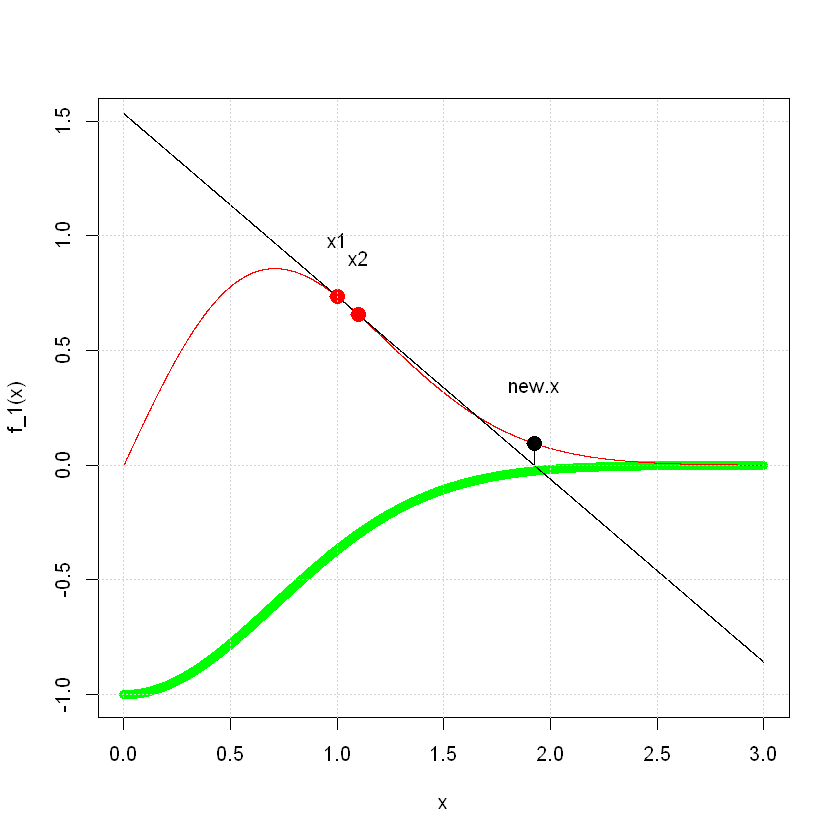

In [406]:
draw_iteration_secant(1,0,3)

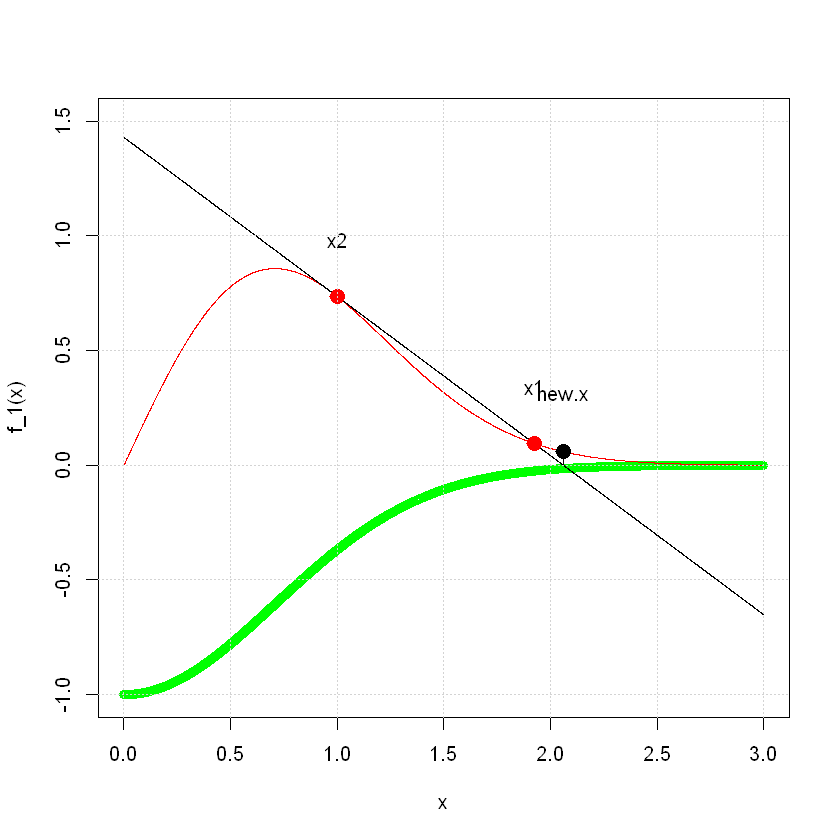

In [407]:
draw_iteration_secant(2,0,3)

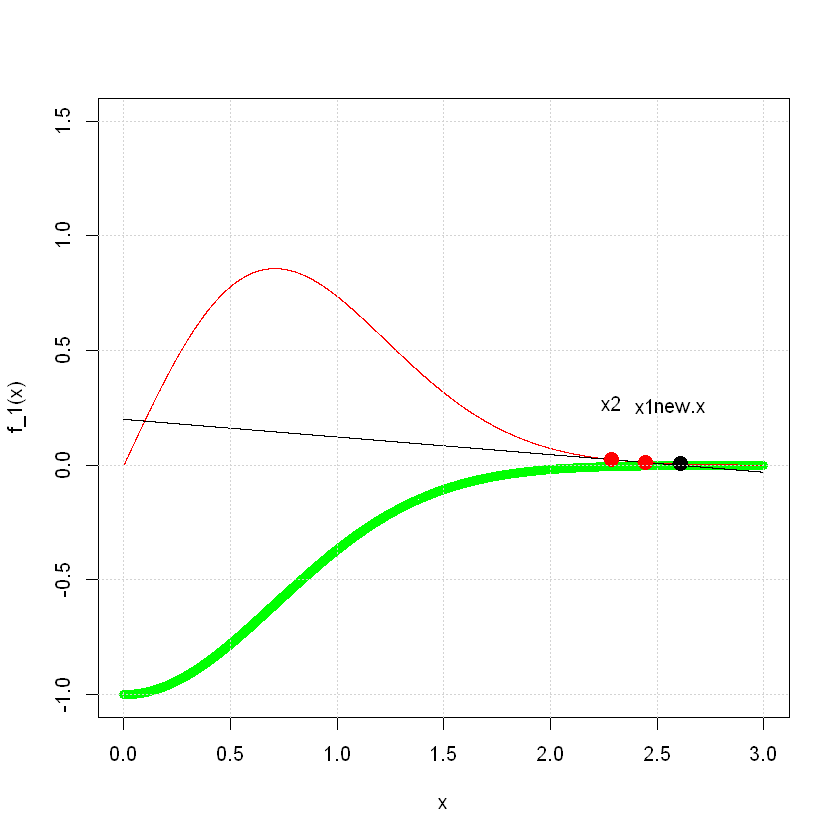

In [408]:
draw_iteration_secant(5,0,3)

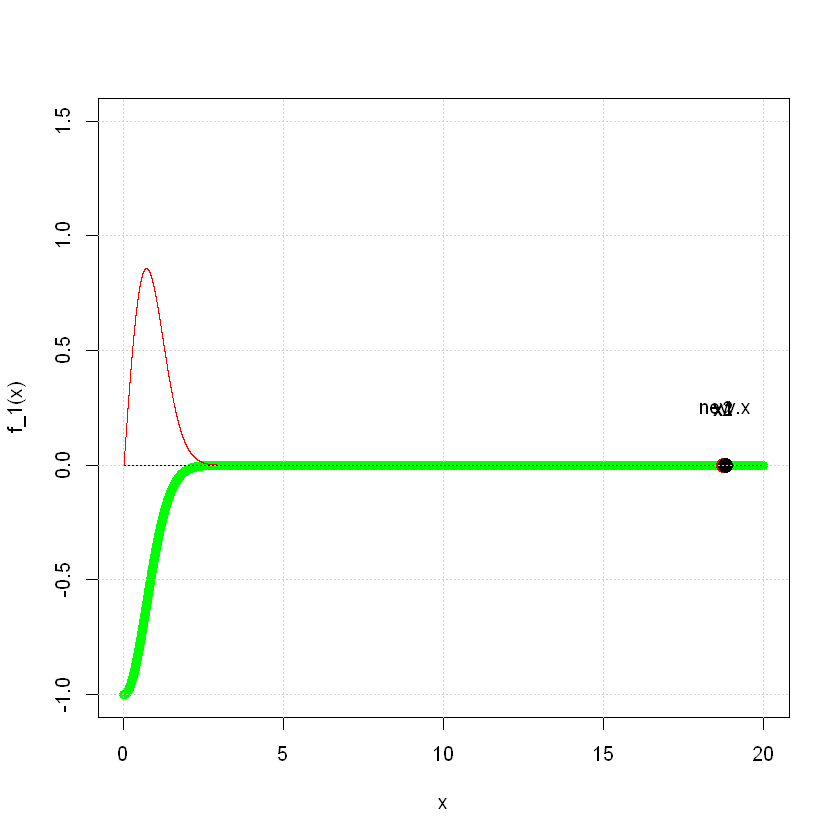

In [409]:
draw_iteration_secant(500,0,20)